<a href="https://colab.research.google.com/github/smmo3333/smmo3333/blob/main/Main_Project_Notebook%20Week%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import relevant packages
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


Note: need to examine analytical model of AHU closer to gain more complete understanding (aka evaluate performance in conventional performance etc)

# Data import and preliminary analysis


> Data source: https://data.openei.org/submissions/910



In [ ]:
#Import MZVAV 2-1
url="https://raw.githubusercontent.com/smmo3333/smmo3333/main/MZVAV-2-1.csv"
df0=pd.read_csv(url)
#df1=pd.read_csv('MZVAV-2-1.csv')
df0.columns = df0.columns.str.lstrip('AHU: ') #Remove the AHU part of each column header 
df0.rename(columns={"eating Coil Valve Control Signal":"Heating Coil Valve Control Signal"},inplace='True')

#Split data to training and test sets
df1= df0.iloc[:6999,:]                    #training
df1_validation=df0.iloc[7000:13999,:]     #validation
df1_test = df0.iloc[14000:,:]             #test
df1

Datetime  ...  Fault Detection Ground Truth
0      8/28/2007 0:00  ...                             1
1      8/28/2007 0:01  ...                             1
2      8/28/2007 0:02  ...                             1
3      8/28/2007 0:03  ...                             1
4      8/28/2007 0:04  ...                             1
...               ...  ...                           ...
6994  8/25/2008 20:34  ...                             0
6995  8/25/2008 20:35  ...                             0
6996  8/25/2008 20:36  ...                             0
6997  8/25/2008 20:37  ...                             0
6998  8/25/2008 20:38  ...                             0

[6999 rows x 19 columns]

In [ ]:
#df2=pd.read_csv('SZCAV.csv')
#df2

In [ ]:
#df3=pd.read_csv('SZVAV.csv')
#df3

In [ ]:
df1.info()
df1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Datetime                                   6999 non-null   object 
 1   Supply Air Temperature                     6999 non-null   float64
 2   Supply Air Temperature Set Point           6999 non-null   int64  
 3   Outdoor Air Temperature                    6999 non-null   float64
 4   Mixed Air Temperature                      6999 non-null   float64
 5   Return Air Temperature                     6999 non-null   float64
 6   Supply Air Fan Status                      6999 non-null   int64  
 7   Return Air Fan Status                      6999 non-null   int64  
 8   Supply Air Fan Speed Control Signal        6999 non-null   float64
 9   Return Air Fan Speed Control Signal        6999 non-null   float64
 10  Exhaust Air Damper Contr

Datetime                                      object
Supply Air Temperature                       float64
Supply Air Temperature Set Point               int64
Outdoor Air Temperature                      float64
Mixed Air Temperature                        float64
Return Air Temperature                       float64
Supply Air Fan Status                          int64
Return Air Fan Status                          int64
Supply Air Fan Speed Control Signal          float64
Return Air Fan Speed Control Signal          float64
Exhaust Air Damper Control Signal            float64
Outdoor Air Damper Control Signal            float64
Return Air Damper Control Signal             float64
Cooling Coil Valve Control Signal            float64
Heating Coil Valve Control Signal            float64
Supply Air Duct Static Pressure Set Point    float64
Supply Air Duct Static Pressure              float64
Occupancy Mode Indicator                       int64
Fault Detection Ground Truth                  

In [ ]:
#Luckily, there are no datasets with missing values so no imputation or value dropping is required.
#df1['Datetime']=pd.to_datetime(df1['Datetime']) #Convert date and time data to appropriate data type
#df1.dtypes
#Commented out, doing the datetime data type change seems to mess with the graphs

<Figure size 432x288 with 0 Axes>

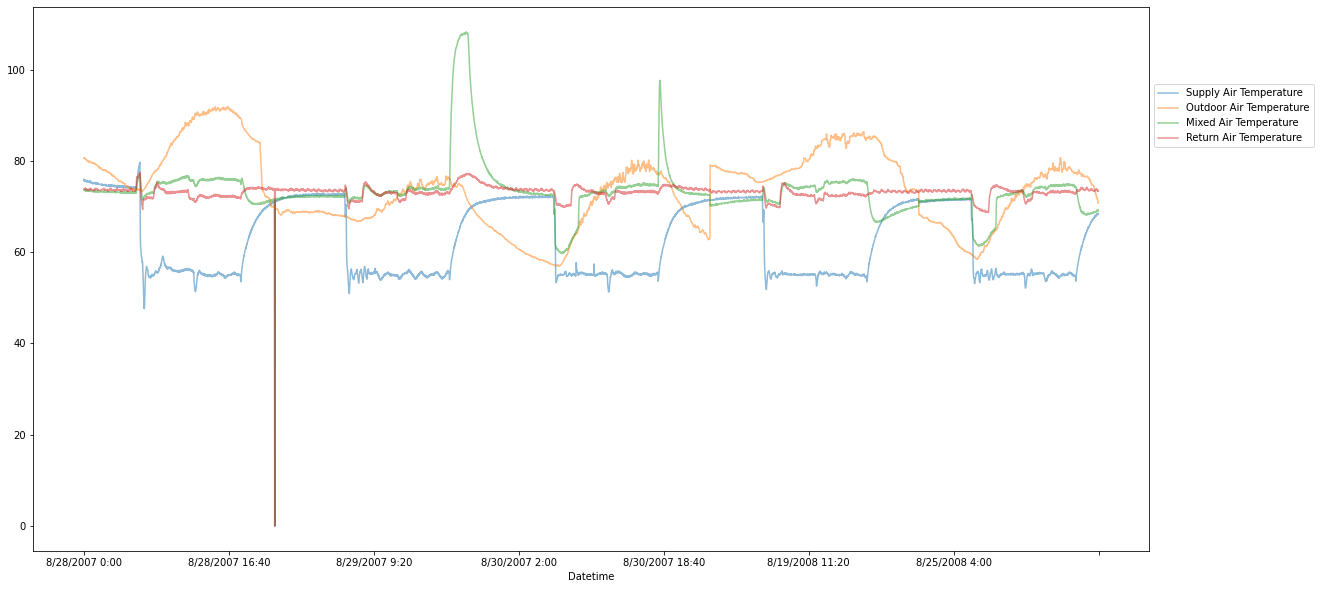

In [ ]:
#From the above graphs, the correlations are generally as expected with a few anomalies that may be indicative of faults.
# For example, it is expected that there is no real correlation between outdoor air temperature and return air temperature under normal conditions.
# It is also expected that there would be a positive correlation between mixed air temperature and outdoor air temperature.



#Plot temperatures according to time
f=plt.figure()
df1.plot(x='Datetime',y=['Supply Air Temperature','Outdoor Air Temperature', 'Mixed Air Temperature','Return Air Temperature'],  alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

#Speculative insight: temperature anomalies, especially in supply, mixed and return air temps are likely where faults occurred.

<Figure size 432x288 with 0 Axes>

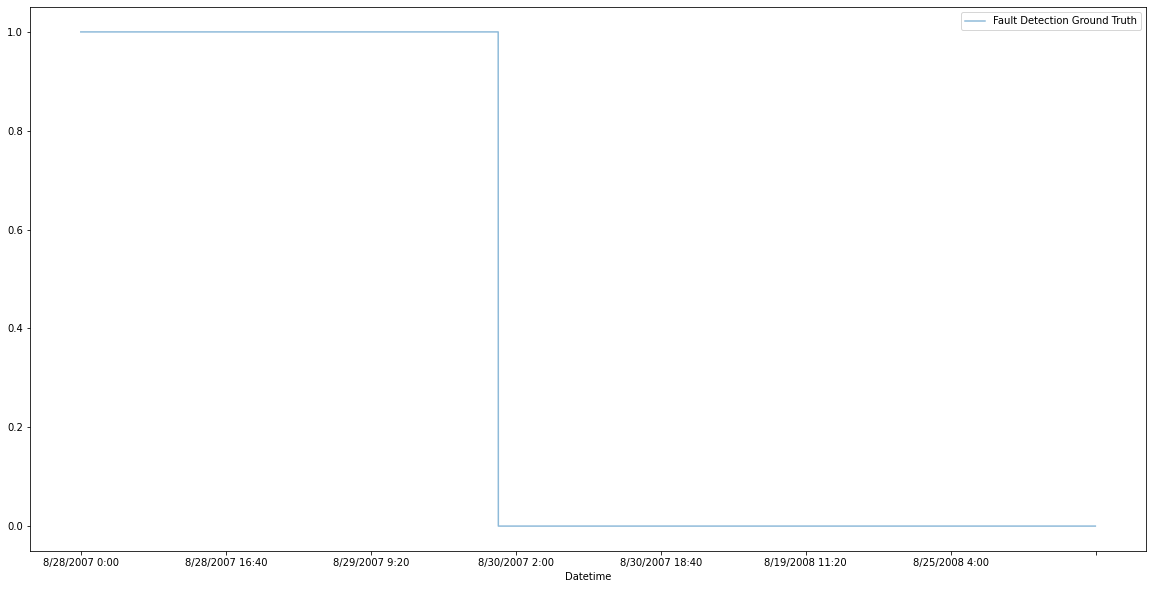

In [ ]:
f=plt.figure()
df1.plot(x='Datetime',y='Fault Detection Ground Truth',alpha=0.5, style='-', figsize=(20,10))

In [ ]:
df1['Supply Air Temperature'].describe()


count    6999.000000
mean       62.604282
std         8.115774
min         0.000000
25%        55.150000
50%        56.660000
75%        71.400000
max        79.690000
Name: Supply Air Temperature, dtype: float64

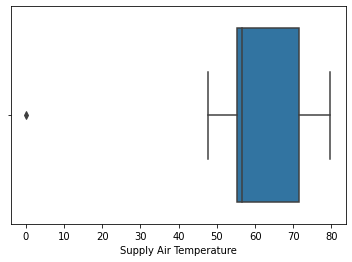

In [ ]:
sns.boxplot(x=df1['Supply Air Temperature'])

In [ ]:
df1['Supply Air Temperature Set Point'].describe()


count    6999.000000
mean       55.001429
std         0.119531
min        55.000000
25%        55.000000
50%        55.000000
75%        55.000000
max        65.000000
Name: Supply Air Temperature Set Point, dtype: float64

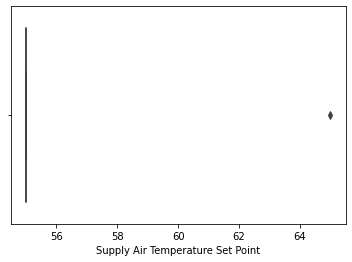

In [ ]:
sns.boxplot(x=df1['Supply Air Temperature Set Point'])

In [ ]:
df1['Outdoor Air Temperature'].describe()

count    6999.000000
mean       73.952016
std         8.124222
min        56.960000
25%        68.090000
50%        74.720000
75%        78.390000
max        91.850000
Name: Outdoor Air Temperature, dtype: float64

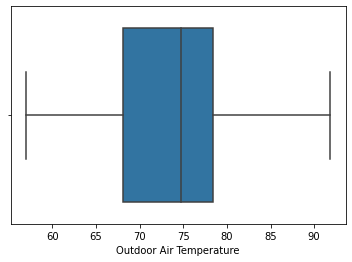

In [ ]:
sns.boxplot(x=df1['Outdoor Air Temperature'])

In [ ]:
df1['Mixed Air Temperature'].describe()

count    6999.000000
mean       73.389111
std         5.830772
min         0.000000
25%        71.630000
50%        73.010000
75%        74.600000
max       108.240000
Name: Mixed Air Temperature, dtype: float64

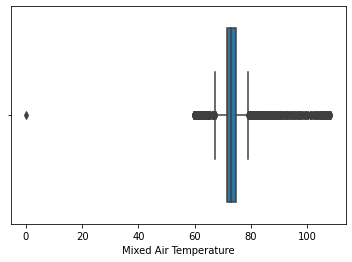

In [ ]:
sns.boxplot(x=df1['Mixed Air Temperature'])

In [ ]:
df1['Return Air Temperature'].describe()

count    6999.000000
mean       73.138495
std         1.472511
min         0.000000
25%        72.810000
50%        73.340000
75%        73.650000
max        77.540000
Name: Return Air Temperature, dtype: float64

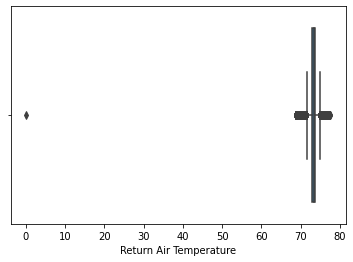

In [ ]:
sns.boxplot(x=df1['Return Air Temperature'])

In [ ]:
# Use covariance to identify and remove outliers (as a 'weak' form of clustering)
datetime=df1['Datetime']           #temporarily store datetime in a separate variable
df1=df1.drop(['Datetime'],axis=1)       #temporarily drop datetime because sklearn covariance cannot input date time values
from sklearn.covariance import EllipticEnvelope
covar = EllipticEnvelope(random_state=0).fit(df1)
# predict returns 1 for an inlier and -1 for an outlier
df1['Cov_Outlier']=covar.predict(df1)
df1.insert(0, 'Datetime', datetime)
df1=df1[df1['Cov_Outlier'] == 1]







/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


In [ ]:
#remove outliers for df1_validation
datetime=df1_validation['Datetime']           #temporarily store datetime in a separate variable
df1_validation=df1_validation.drop(['Datetime'],axis=1)       #temporarily drop datetime because sklearn covariance cannot input date time values
from sklearn.covariance import EllipticEnvelope
covar = EllipticEnvelope(random_state=0).fit(df1_validation)
# predict returns 1 for an inlier and -1 for an outlier
df1_validation['Cov_Outlier']=covar.predict(df1_validation)
df1_validation.insert(0, 'Datetime', datetime)
df1_validation=df1_validation[df1_validation['Cov_Outlier'] == 1]

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


In [ ]:
#remove outliers for df1_test
datetime=df1_test['Datetime']           #temporarily store datetime in a separate variable
df1_test=df1_test.drop(['Datetime'],axis=1)       #temporarily drop datetime because sklearn covariance cannot input date time values
from sklearn.covariance import EllipticEnvelope
covar = EllipticEnvelope(random_state=0).fit(df1_test)
# predict returns 1 for an inlier and -1 for an outlier
df1_test['Cov_Outlier']=covar.predict(df1_test)
df1_test.insert(0, 'Datetime', datetime)
df1_test=df1_test[df1_test['Cov_Outlier'] == 1]

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


<Figure size 432x288 with 0 Axes>

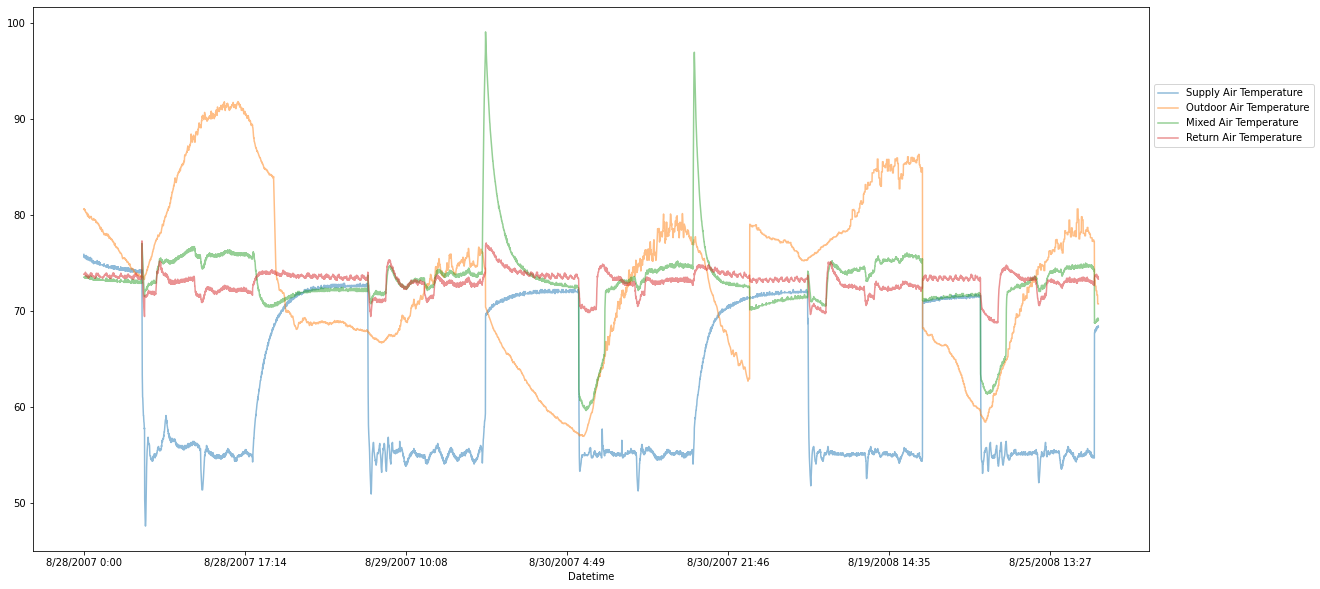

In [ ]:
#Plot temperatures according to time
f=plt.figure()
df1.plot(x='Datetime',y=['Supply Air Temperature','Outdoor Air Temperature', 'Mixed Air Temperature','Return Air Temperature'],  alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

<Figure size 432x288 with 0 Axes>

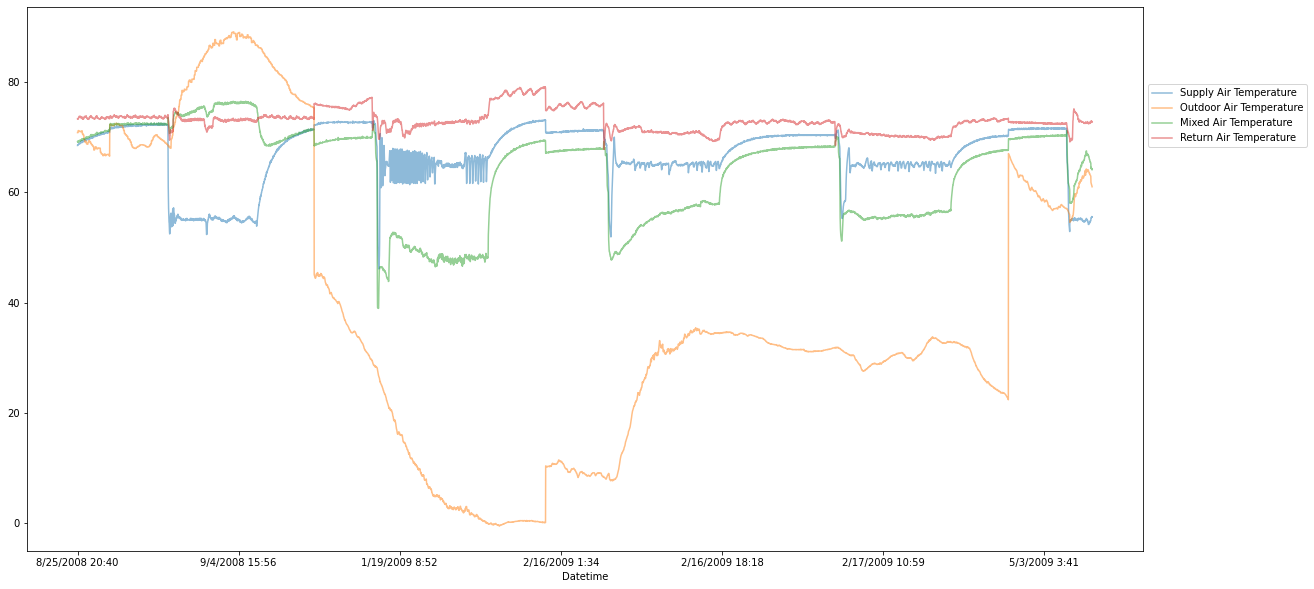

In [ ]:
#Plot temperatures according to time
f=plt.figure()
df1_validation.plot(x='Datetime',y=['Supply Air Temperature','Outdoor Air Temperature', 'Mixed Air Temperature','Return Air Temperature'],  alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

<Figure size 432x288 with 0 Axes>

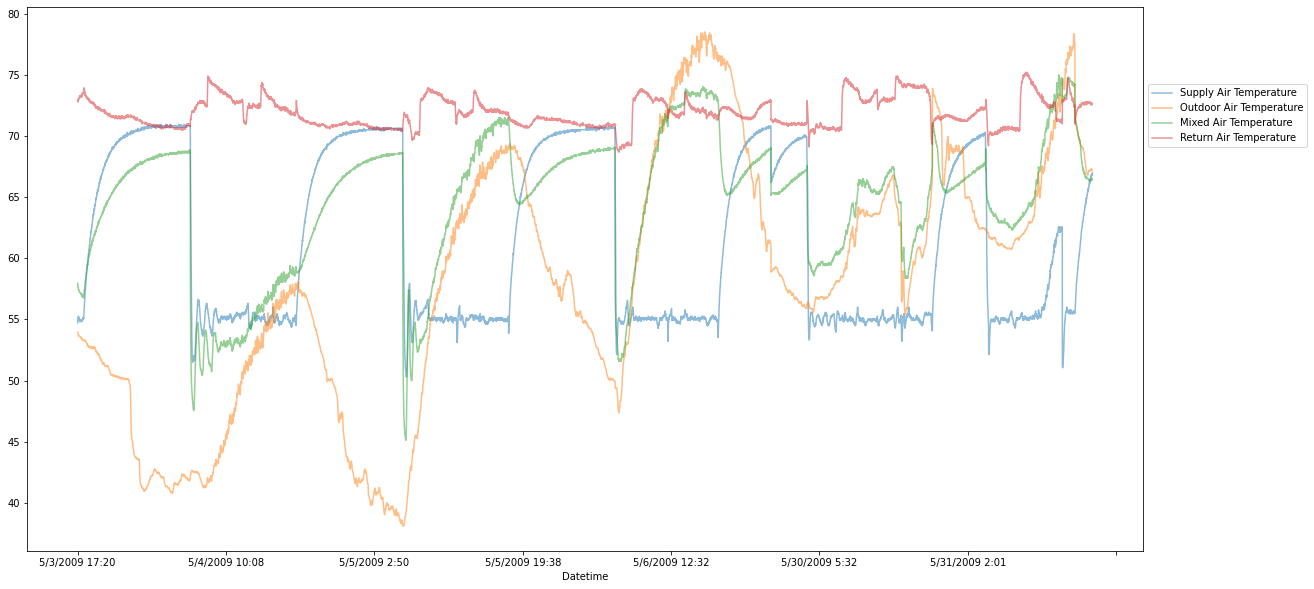

In [ ]:
#Plot temperatures according to time
f=plt.figure()
df1_test.plot(x='Datetime',y=['Supply Air Temperature','Outdoor Air Temperature', 'Mixed Air Temperature','Return Air Temperature'],  alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

In [ ]:
#PRINCIPAL COMPONENTS ANALYSIS


#datetime=df1['Datetime']           #temporarily store datetime in a separate variable
#df1=df1.drop(['Datetime'],axis=1)       #temporarily drop datetime because sklearn covariance cannot input date time values
#from sklearn.decomposition import PCA
#def pca_fun(n_components, data):
#    pca = PCA(n_components=n_components).fit(data)
#    data = pca.transform(data)
#    return data

#data = pca_fun(5,df1)
#df1.insert(0, 'Datetime', datetime)
#data

from sklearn.preprocessing import StandardScaler
features = ['Supply Air Temperature', 'Outdoor Air Temperature', 'Mixed Air Temperature', 'Return Air Temperature']
x = df1.loc[:, features].values                             # Separating out the features
y = df1.loc[:,['Fault Detection Ground Truth']].values      # Separating out the target
x = StandardScaler().fit_transform(x)                       # Standardizing the features 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3'])
print(pca.explained_variance_ratio_)


[0.42857359 0.38591009 0.11444979]


In [ ]:
finalDf = pd.concat([principalDf, df1[['Fault Detection Ground Truth']]], axis = 1)
#finalDf=finalDf.dropna()
finalDf


pc1       pc2       pc3  Fault Detection Ground Truth
0     1.256188  0.477796 -1.475209                           1.0
1     1.236704  0.487668 -1.464348                           1.0
2     1.237555  0.486216 -1.462740                           1.0
3     1.227633  0.490903 -1.456515                           1.0
4     1.247968  0.479579 -1.465767                           1.0
...        ...       ...       ...                           ...
6994       NaN       NaN       NaN                           0.0
6995       NaN       NaN       NaN                           0.0
6996       NaN       NaN       NaN                           0.0
6997       NaN       NaN       NaN                           0.0
6998       NaN       NaN       NaN                           0.0

[6866 rows x 4 columns]

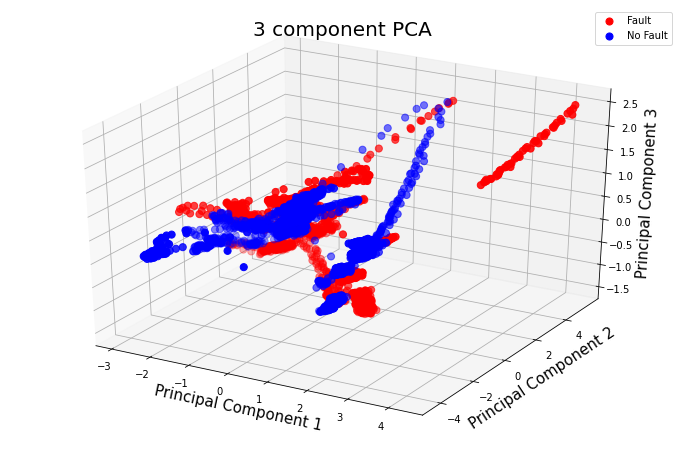

In [ ]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [1.0,0.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Fault Detection Ground Truth'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], finalDf.loc[indicesToKeep, 'pc3'], c = color,s = 50)
legend=['Fault','No Fault']
ax.legend(legend)
ax.grid()

#3d PCA with 3 components: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

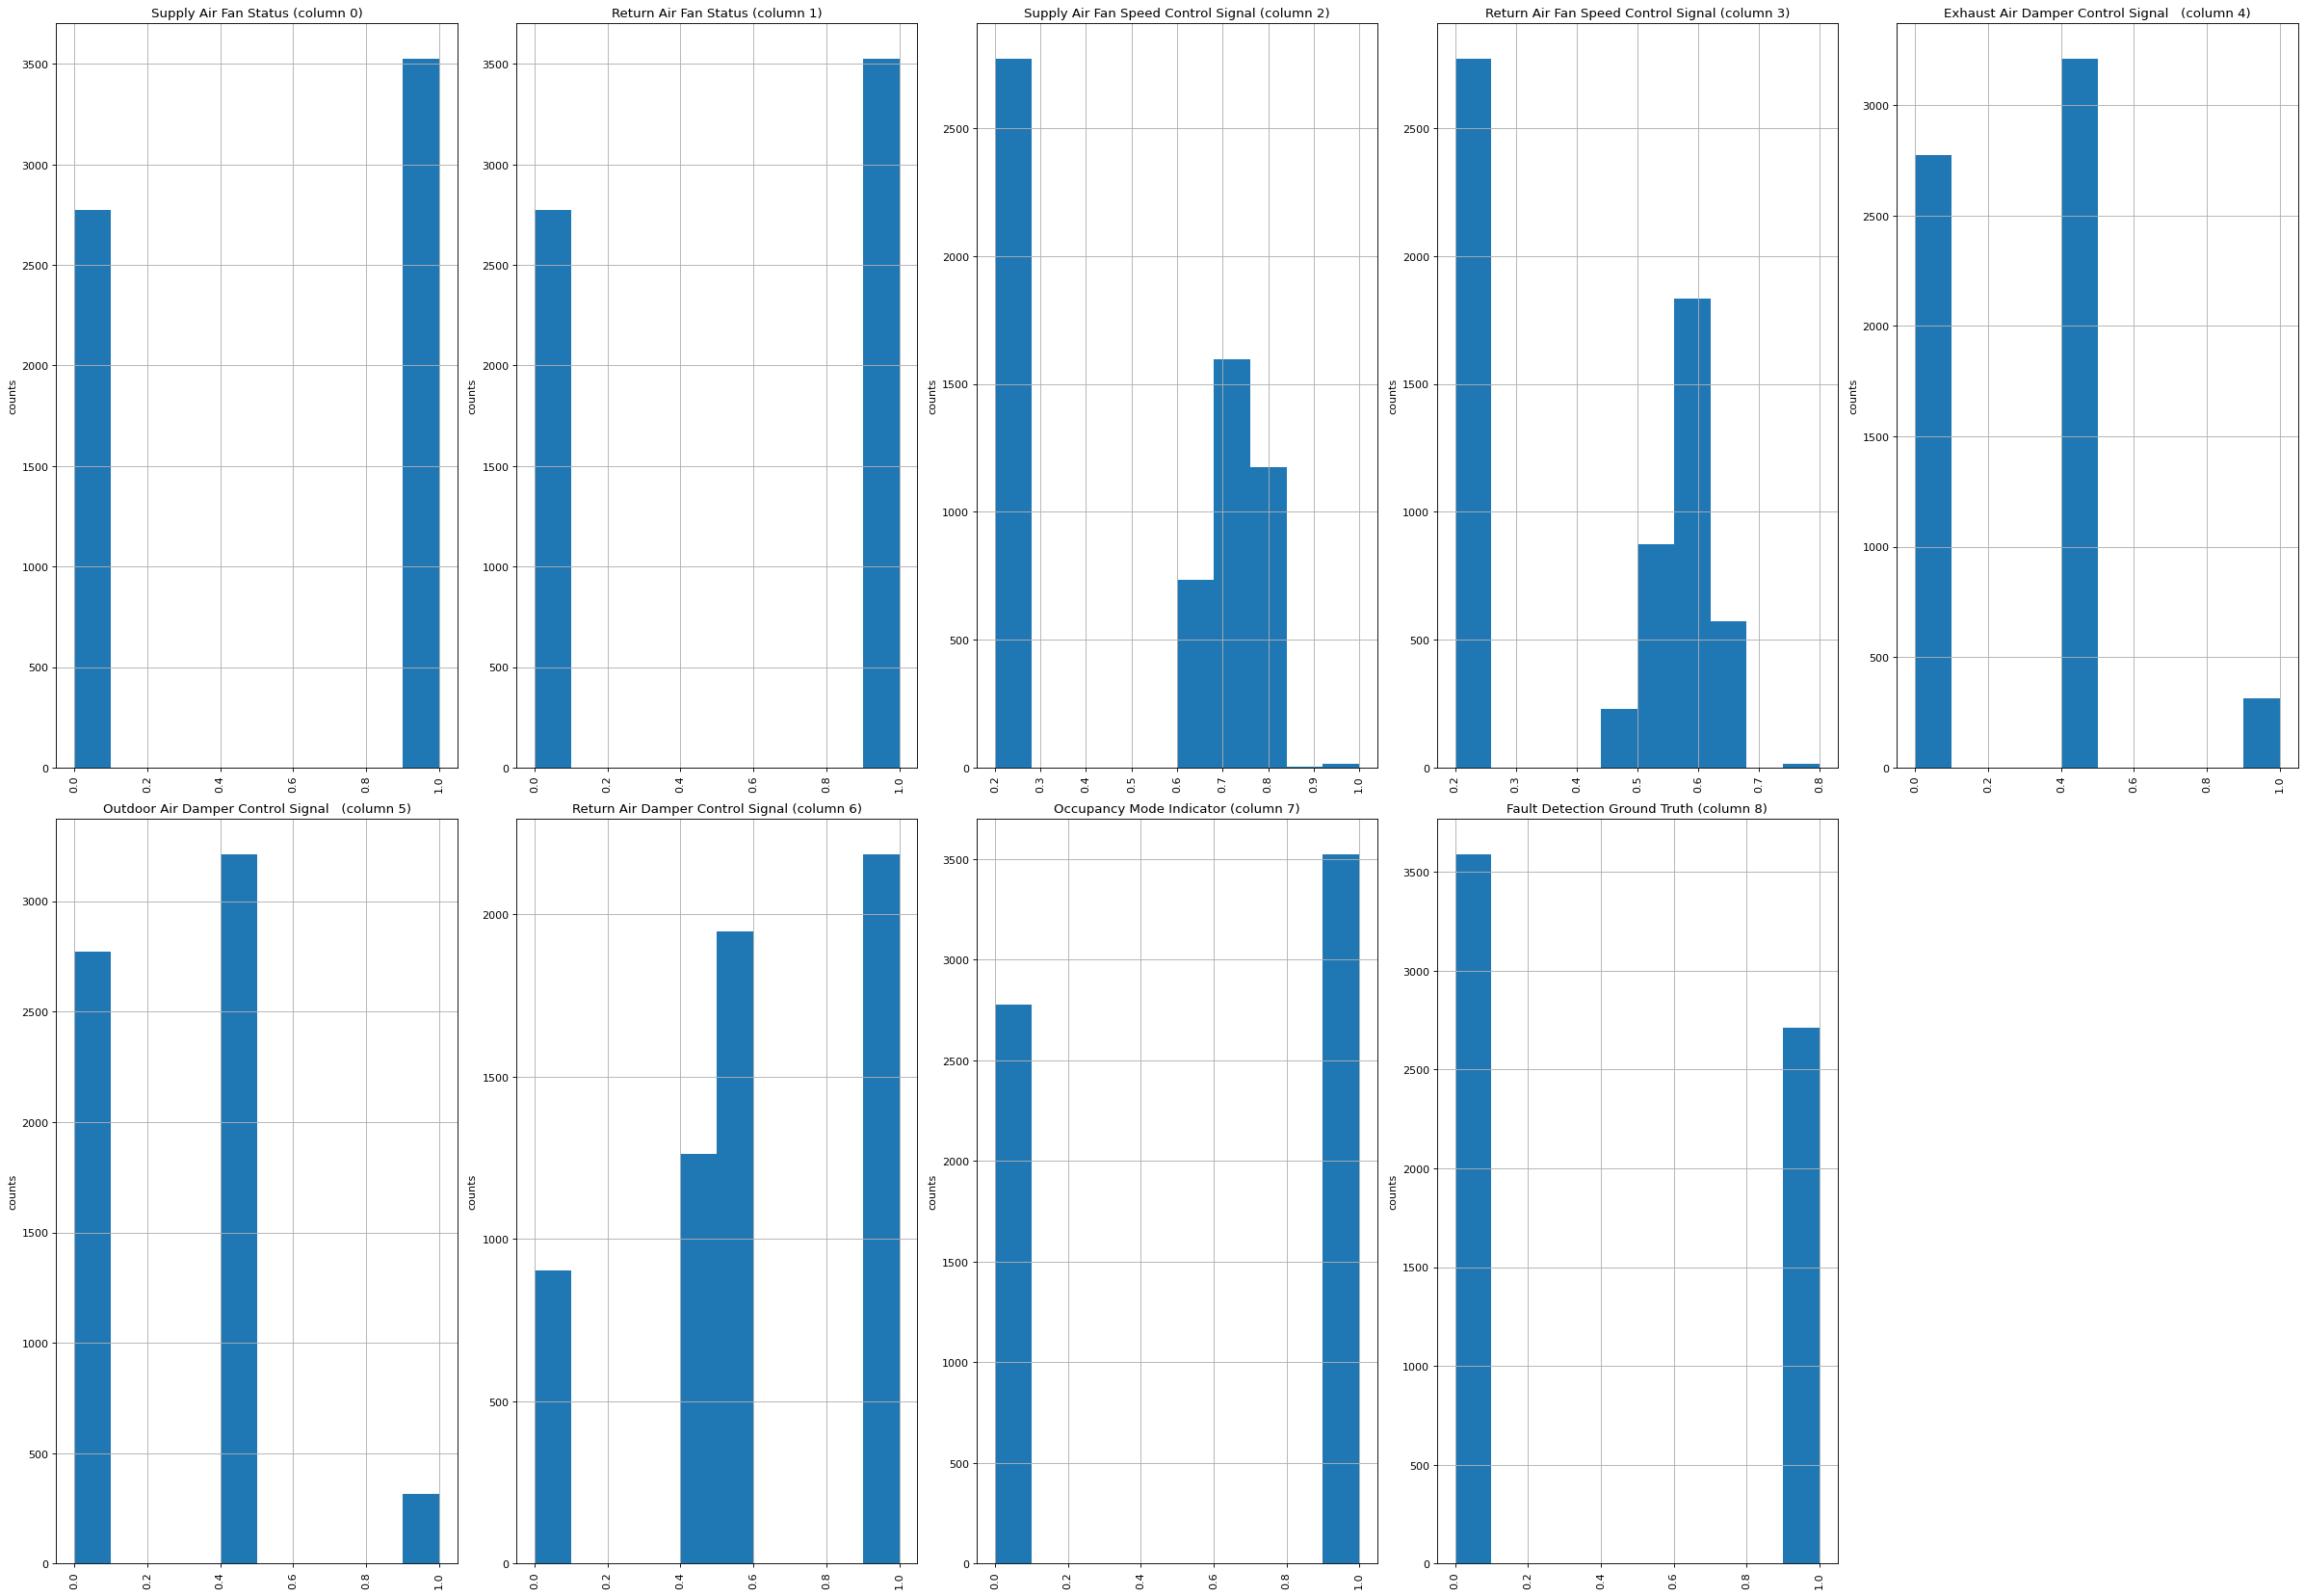

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df1, 10, 5)



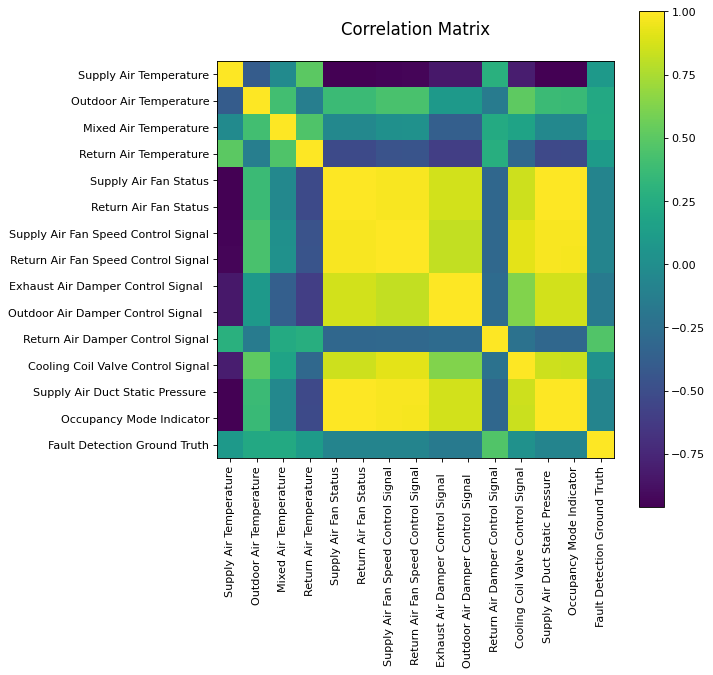

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()



plotCorrelationMatrix(df1, 8)



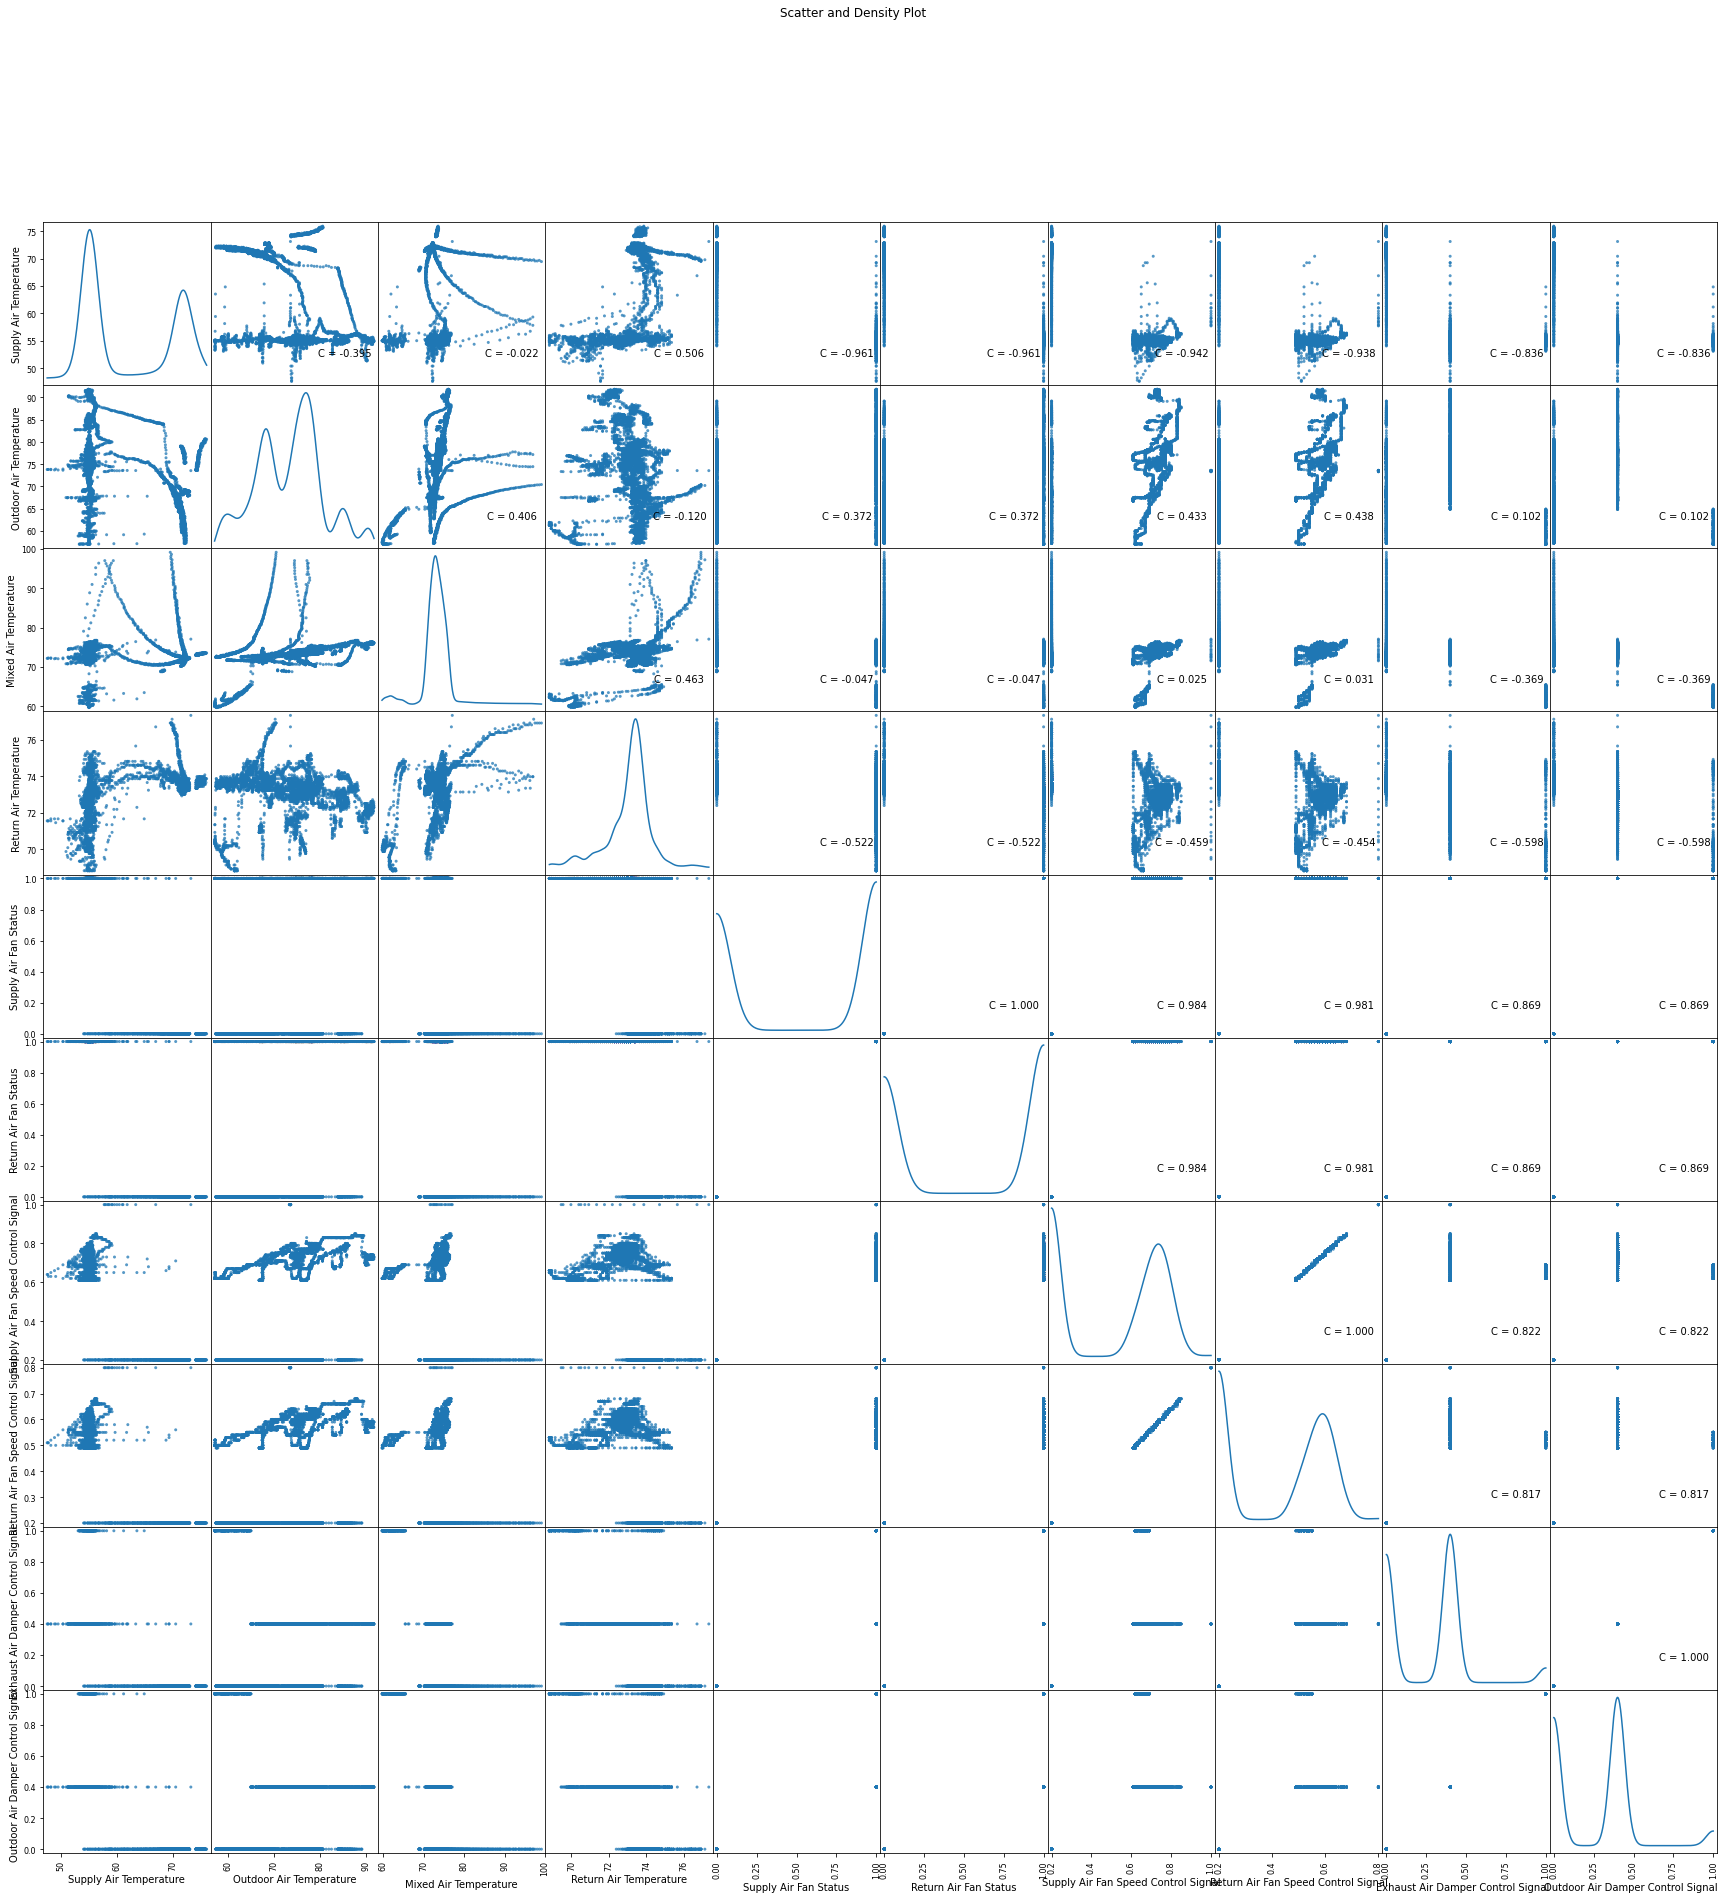

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('C = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)      #Correlation coefficient
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df1, 30, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f56ad6fa8d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


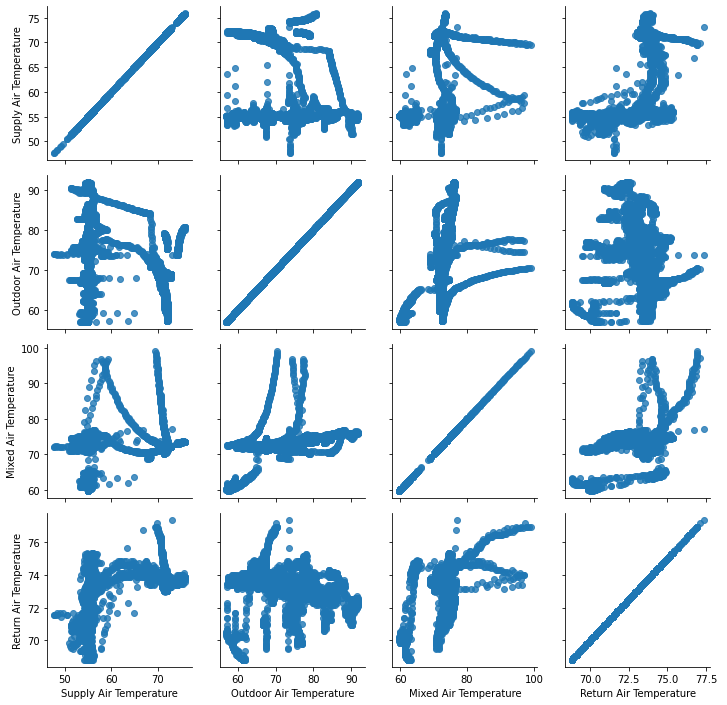

In [ ]:
#Attempt to find correlation anomalies amonng temeperatures
g = sns.PairGrid(df1, vars=['Supply Air Temperature', 'Outdoor Air Temperature','Mixed Air Temperature','Return Air Temperature'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

# Unsupervised Learning (k means clustering)

In [ ]:
#k-means clustering
x=df1[['Supply Air Temperature','Outdoor Air Temperature','Mixed Air Temperature','Return Air Temperature','Supply Air Fan Status','Return Air Fan Status','Supply Air Fan Speed Control Signal','Return Air Fan Speed Control Signal','Return Air Damper Control Signal','Cooling Coil Valve Control Signal','Heating Coil Valve Control Signal','Occupancy Mode Indicator']]

### 	
y=df1[['Fault Detection Ground Truth']]
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[4 4 4 ... 0 0 0]


array([[7.15899228e+01, 6.53658254e+01, 7.34288658e+01, 7.37975713e+01,
        1.18764846e-03, 1.18764846e-03, 2.00611639e-01, 2.00433492e-01,
        7.82779097e-01, 5.04750594e-04, 0.00000000e+00, 2.96912114e-03],
       [5.52461359e+01, 7.44538301e+01, 7.39010743e+01, 7.28270488e+01,
        9.68577495e-01, 9.68577495e-01, 7.04717622e-01, 5.65244161e-01,
        5.39023355e-01, 4.91647558e-01, 0.00000000e+00, 9.66454352e-01],
       [5.51362037e+01, 6.06764198e+01, 6.23191975e+01, 7.12168827e+01,
        1.00000000e+00, 1.00000000e+00, 6.50617284e-01, 5.21419753e-01,
        4.96913580e-01, 2.32746914e-01, 0.00000000e+00, 1.00000000e+00],
       [5.56266294e+01, 8.69529949e+01, 7.53185685e+01, 7.24795330e+01,
        9.27918782e-01, 9.27918782e-01, 7.22771574e-01, 5.80568528e-01,
        5.49847716e-01, 5.99401015e-01, 0.00000000e+00, 9.23857868e-01],
       [7.19262671e+01, 7.69884648e+01, 7.21502944e+01, 7.36059096e+01,
        6.30914826e-03, 6.30914826e-03, 2.03669821e-01, 2.02

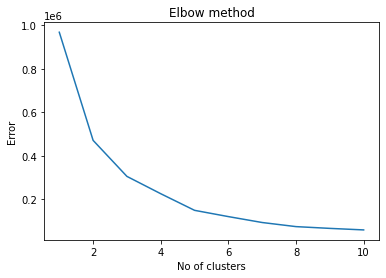

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 ... 1 1 1]


array([[5.57373160e+01, 8.07247829e+01, 7.47020461e+01, 7.27125179e+01,
        9.19969800e-01, 9.19969800e-01, 6.99743299e-01, 5.62872782e-01,
        5.50849377e-01, 5.27365043e-01, 0.00000000e+00, 9.16572291e-01],
       [7.18408252e+01, 6.91927793e+01, 7.30150759e+01, 7.37207435e+01,
        3.50330868e-03, 3.50330868e-03, 2.02070845e-01, 2.01506423e-01,
        7.08291164e-01, 1.95017517e-03, 0.00000000e+00, 5.06033476e-03],
       [5.50537373e+01, 6.69218409e+01, 6.95882794e+01, 7.23816744e+01,
        1.00000000e+00, 1.00000000e+00, 6.85587419e-01, 5.49028677e-01,
        5.35800185e-01, 3.93765032e-01, 0.00000000e+00, 1.00000000e+00]])

Text(0, 0.5, 'Fault')

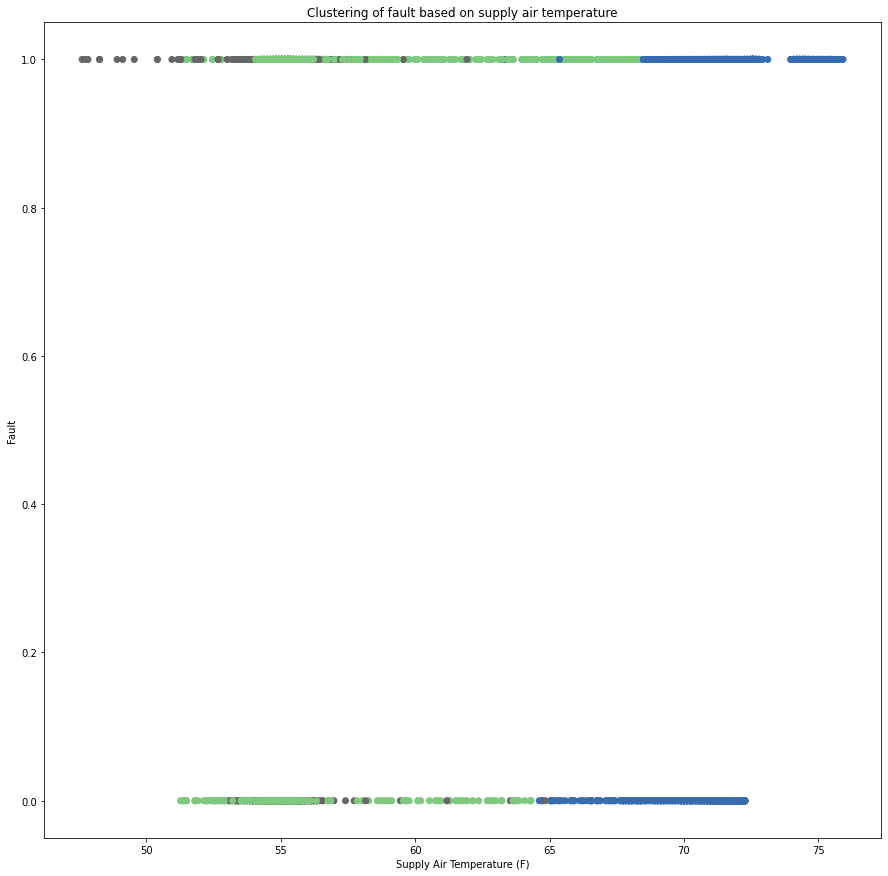

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(x['Supply Air Temperature'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of fault based on supply air temperature')
plt.xlabel('Supply Air Temperature (F)')
plt.ylabel('Fault')

Text(0, 0.5, 'Fault')

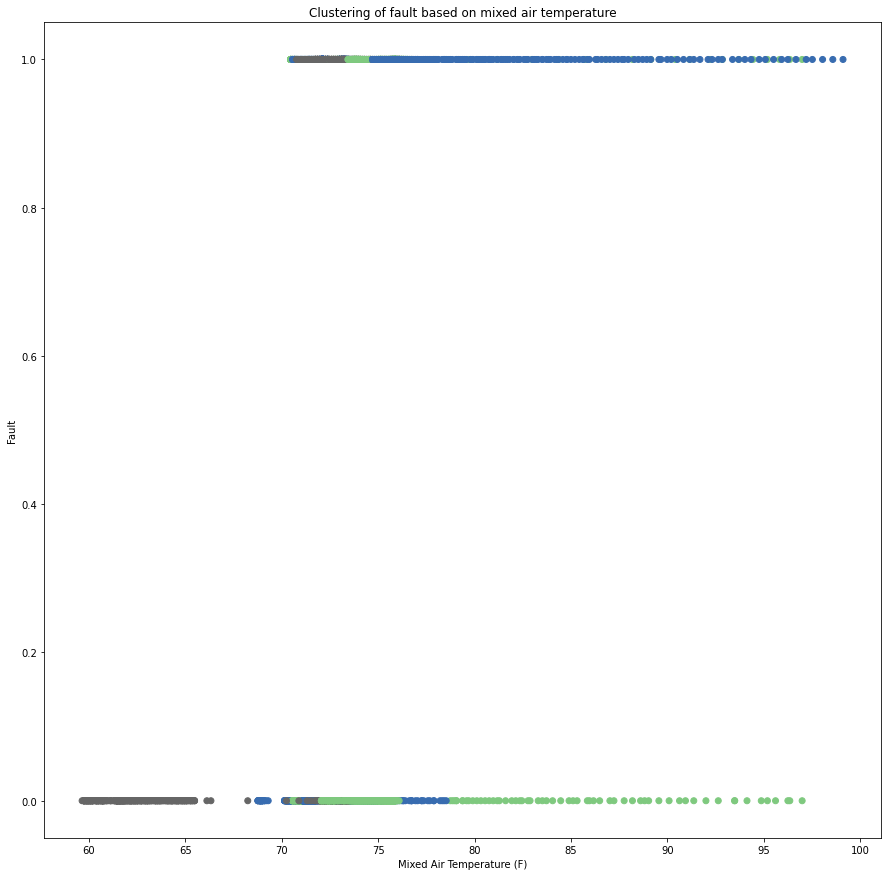

In [ ]:


plt.figure(figsize=(15, 15))
plt.scatter(x['Mixed Air Temperature'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of fault based on mixed air temperature')
plt.xlabel('Mixed Air Temperature (F)')
plt.ylabel('Fault')



Text(0, 0.5, 'Fault')

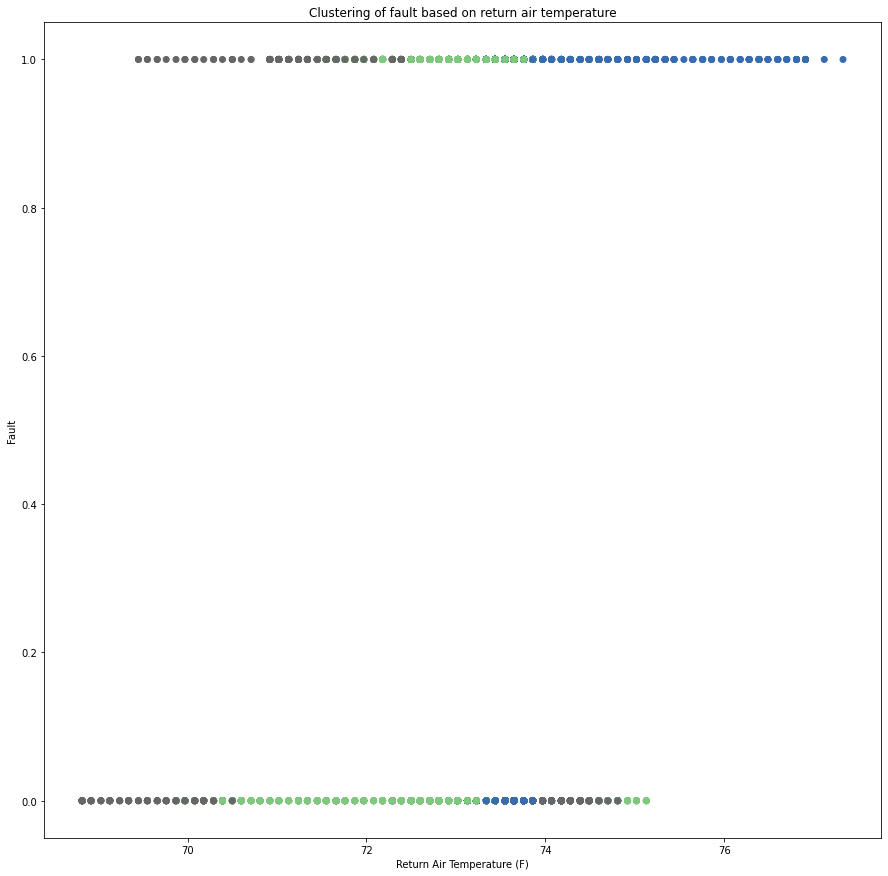

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(x['Return Air Temperature'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of fault based on return air temperature')
plt.xlabel('Return Air Temperature (F)')
plt.ylabel('Fault')

Text(0, 0.5, 'Return Air Temperature')

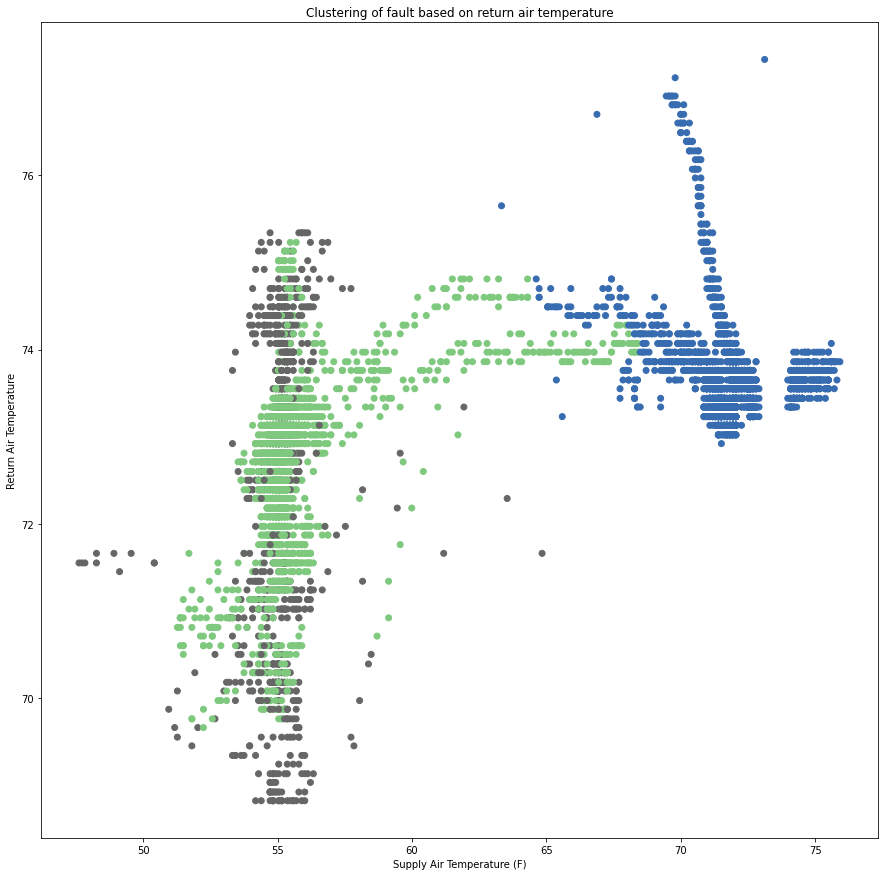

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(x['Supply Air Temperature'], x['Return Air Temperature'], c=y_kmeans3, cmap='Accent')
plt.title('Clustering of fault based on return air temperature')
plt.xlabel('Supply Air Temperature (F)')
plt.ylabel('Return Air Temperature')

I primarily interrogated the temperature values. None of the individual temperatures seem to be a good indicator of a fault occurring, and it is not possible to cluster data with binary values (aka signal on-off) and non-normalized signal values. I think that classification would be much more useful for this.

# Unsupervised Learning (hierarchical clustering)

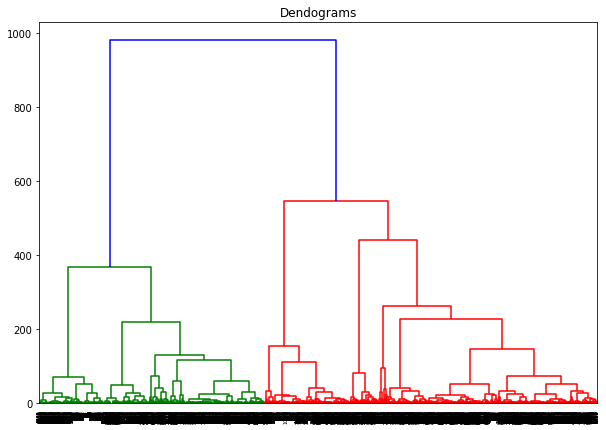

In [ ]:
import scipy.cluster.hierarchy as shc

df1_mod=df1[['Supply Air Temperature','Mixed Air Temperature','Return Air Temperature','Outdoor Air Temperature']]
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df1_mod, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1_mod)

array([0, 0, 0, ..., 0, 0, 0])

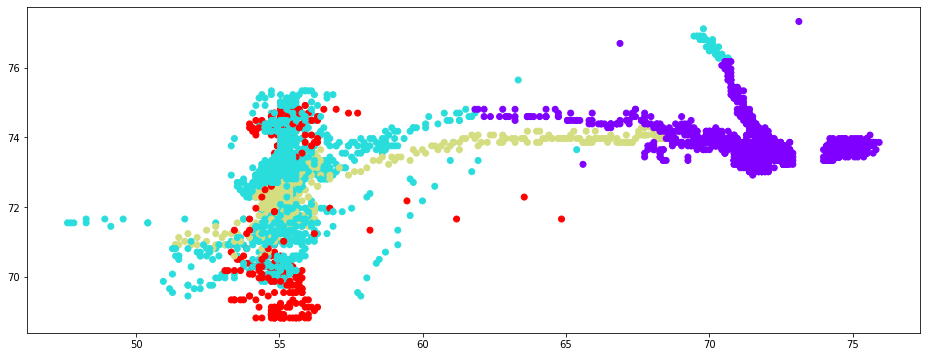

In [ ]:
plt.figure(figsize=(16,6)) 
plt.scatter(x[['Supply Air Temperature']], x[['Return Air Temperature']], c=cluster.labels_, cmap='rainbow')

# Unsupervised Learning (Gaussian mixture modeling)

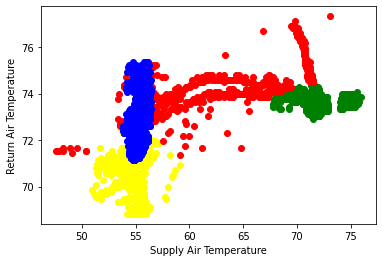

In [ ]:
#Attempt GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df1_mod[['Supply Air Temperature','Return Air Temperature']])

#predictions from gmm
labels = gmm.predict(df1_mod[['Supply Air Temperature','Return Air Temperature']])
frame = pd.DataFrame(df1_mod[['Supply Air Temperature','Return Air Temperature']])
frame['cluster'] = labels
frame.columns = ['Supply Air Temperature','Return Air Temperature', 'cluster']

color=['yellow','green','red','blue']
for k in range(0,4):
    df1_gmm = frame[frame["cluster"]==k]
    plt.scatter(df1_gmm["Supply Air Temperature"],df1_gmm["Return Air Temperature"],c=color[k])
plt.xlabel('Supply Air Temperature')
plt.ylabel('Return Air Temperature')
plt.show()

# Unsupervised Learning (ANN: self-organizing maps)

https://sites.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/som.html

https://pypi.org/project/sklearn-som/

In [ ]:
!pip install sklearn-som
from sklearn_som.som import SOM


In [ ]:

df1_datadrop=df1.drop(['Datetime','Fault Detection Ground Truth','Cov_Outlier','Supply Air Temperature Set Point'],axis=1)
df1_SOM=df1[['Supply Air Temperature','Return Air Temperature']] 
df1_predict=df1.iloc[:,18].values
df1_SOM=df1_datadrop.iloc[:,:15].values

fault_som=SOM(m=2,n=1,dim=15)
fault_som.fit(df1_SOM)

predictions = fault_som.predict(df1_SOM)


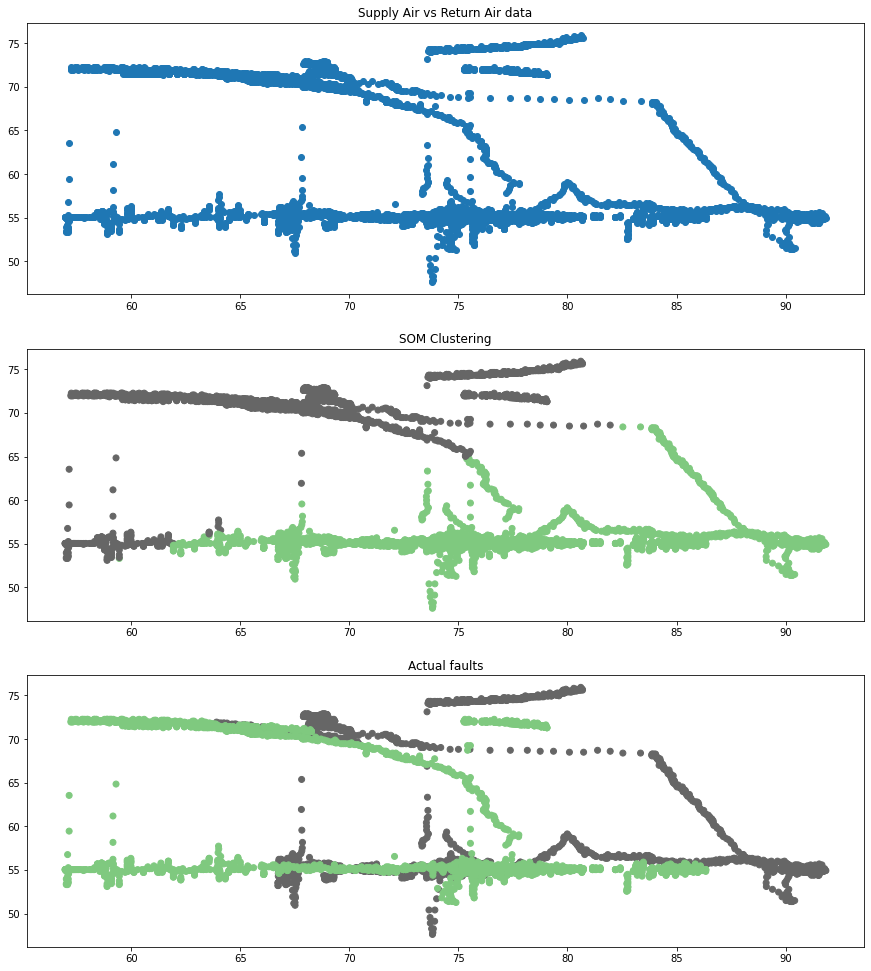

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,17))
x = df1_SOM[:,1]
y = df1_SOM[:,0]

ax[0].scatter(x, y, cmap='Accent')
ax[0].title.set_text('Supply Air vs Return Air data')
ax[1].scatter(x, y, c=predictions, cmap='Accent')
ax[1].title.set_text('SOM Clustering')
ax[2].scatter(x, y, c=df1_predict, cmap='Accent')
ax[2].title.set_text('Actual faults')


In [ ]:
accuracy_count=predictions[predictions==df1_predict]
accuracy=(len(accuracy_count)/len(predictions))*100
print('Accuracy of SOM is',accuracy,'%')

Accuracy of SOM is 49.72217812351167 %


# Supervised Learning (decision trees classification)


Training set vs validation data

In [ ]:
# Creating the Predictor and Response Variables (dtc = decision trees classification)
dftrain = df1.drop(['Datetime','Cov_Outlier'],axis=1)
dftest = df1_validation.drop(['Datetime','Cov_Outlier'],axis=1)
x_train_dtc = pd.DataFrame([])
x_train_dtc = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_dtc = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_dtc = dftrain['Fault Detection Ground Truth'].to_numpy()
y_test_dtc = dftest['Fault Detection Ground Truth'].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_dtc)

x_train_dtc = scaler.transform(x_train_dtc)
x_test_dtc = scaler.transform(x_test_dtc)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_dtc,y_train_dtc)
y_pred_dtc = classifier.predict(x_test_dtc)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_dtc, y_pred_dtc))
print(classification_report(y_test_dtc, y_pred_dtc))

[[6299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6299

    accuracy                           1.00      6299
   macro avg       1.00      1.00      1.00      6299
weighted avg       1.00      1.00      1.00      6299



In [ ]:
dtc_acc_count=y_pred_dtc[y_pred_dtc==y_test_dtc]
dtc_acc=(len(dtc_acc_count)/len(y_pred_dtc))*100
print('Accuracy of decision trees classification is',dtc_acc,'%')

Accuracy of decision trees classification is 100.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


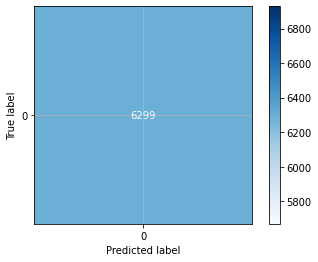

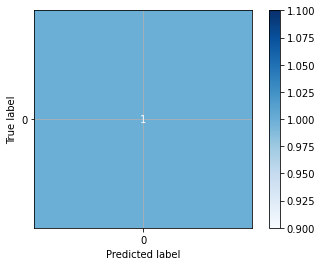

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test_dtc, y_test_dtc, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test_dtc, y_test_dtc, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()

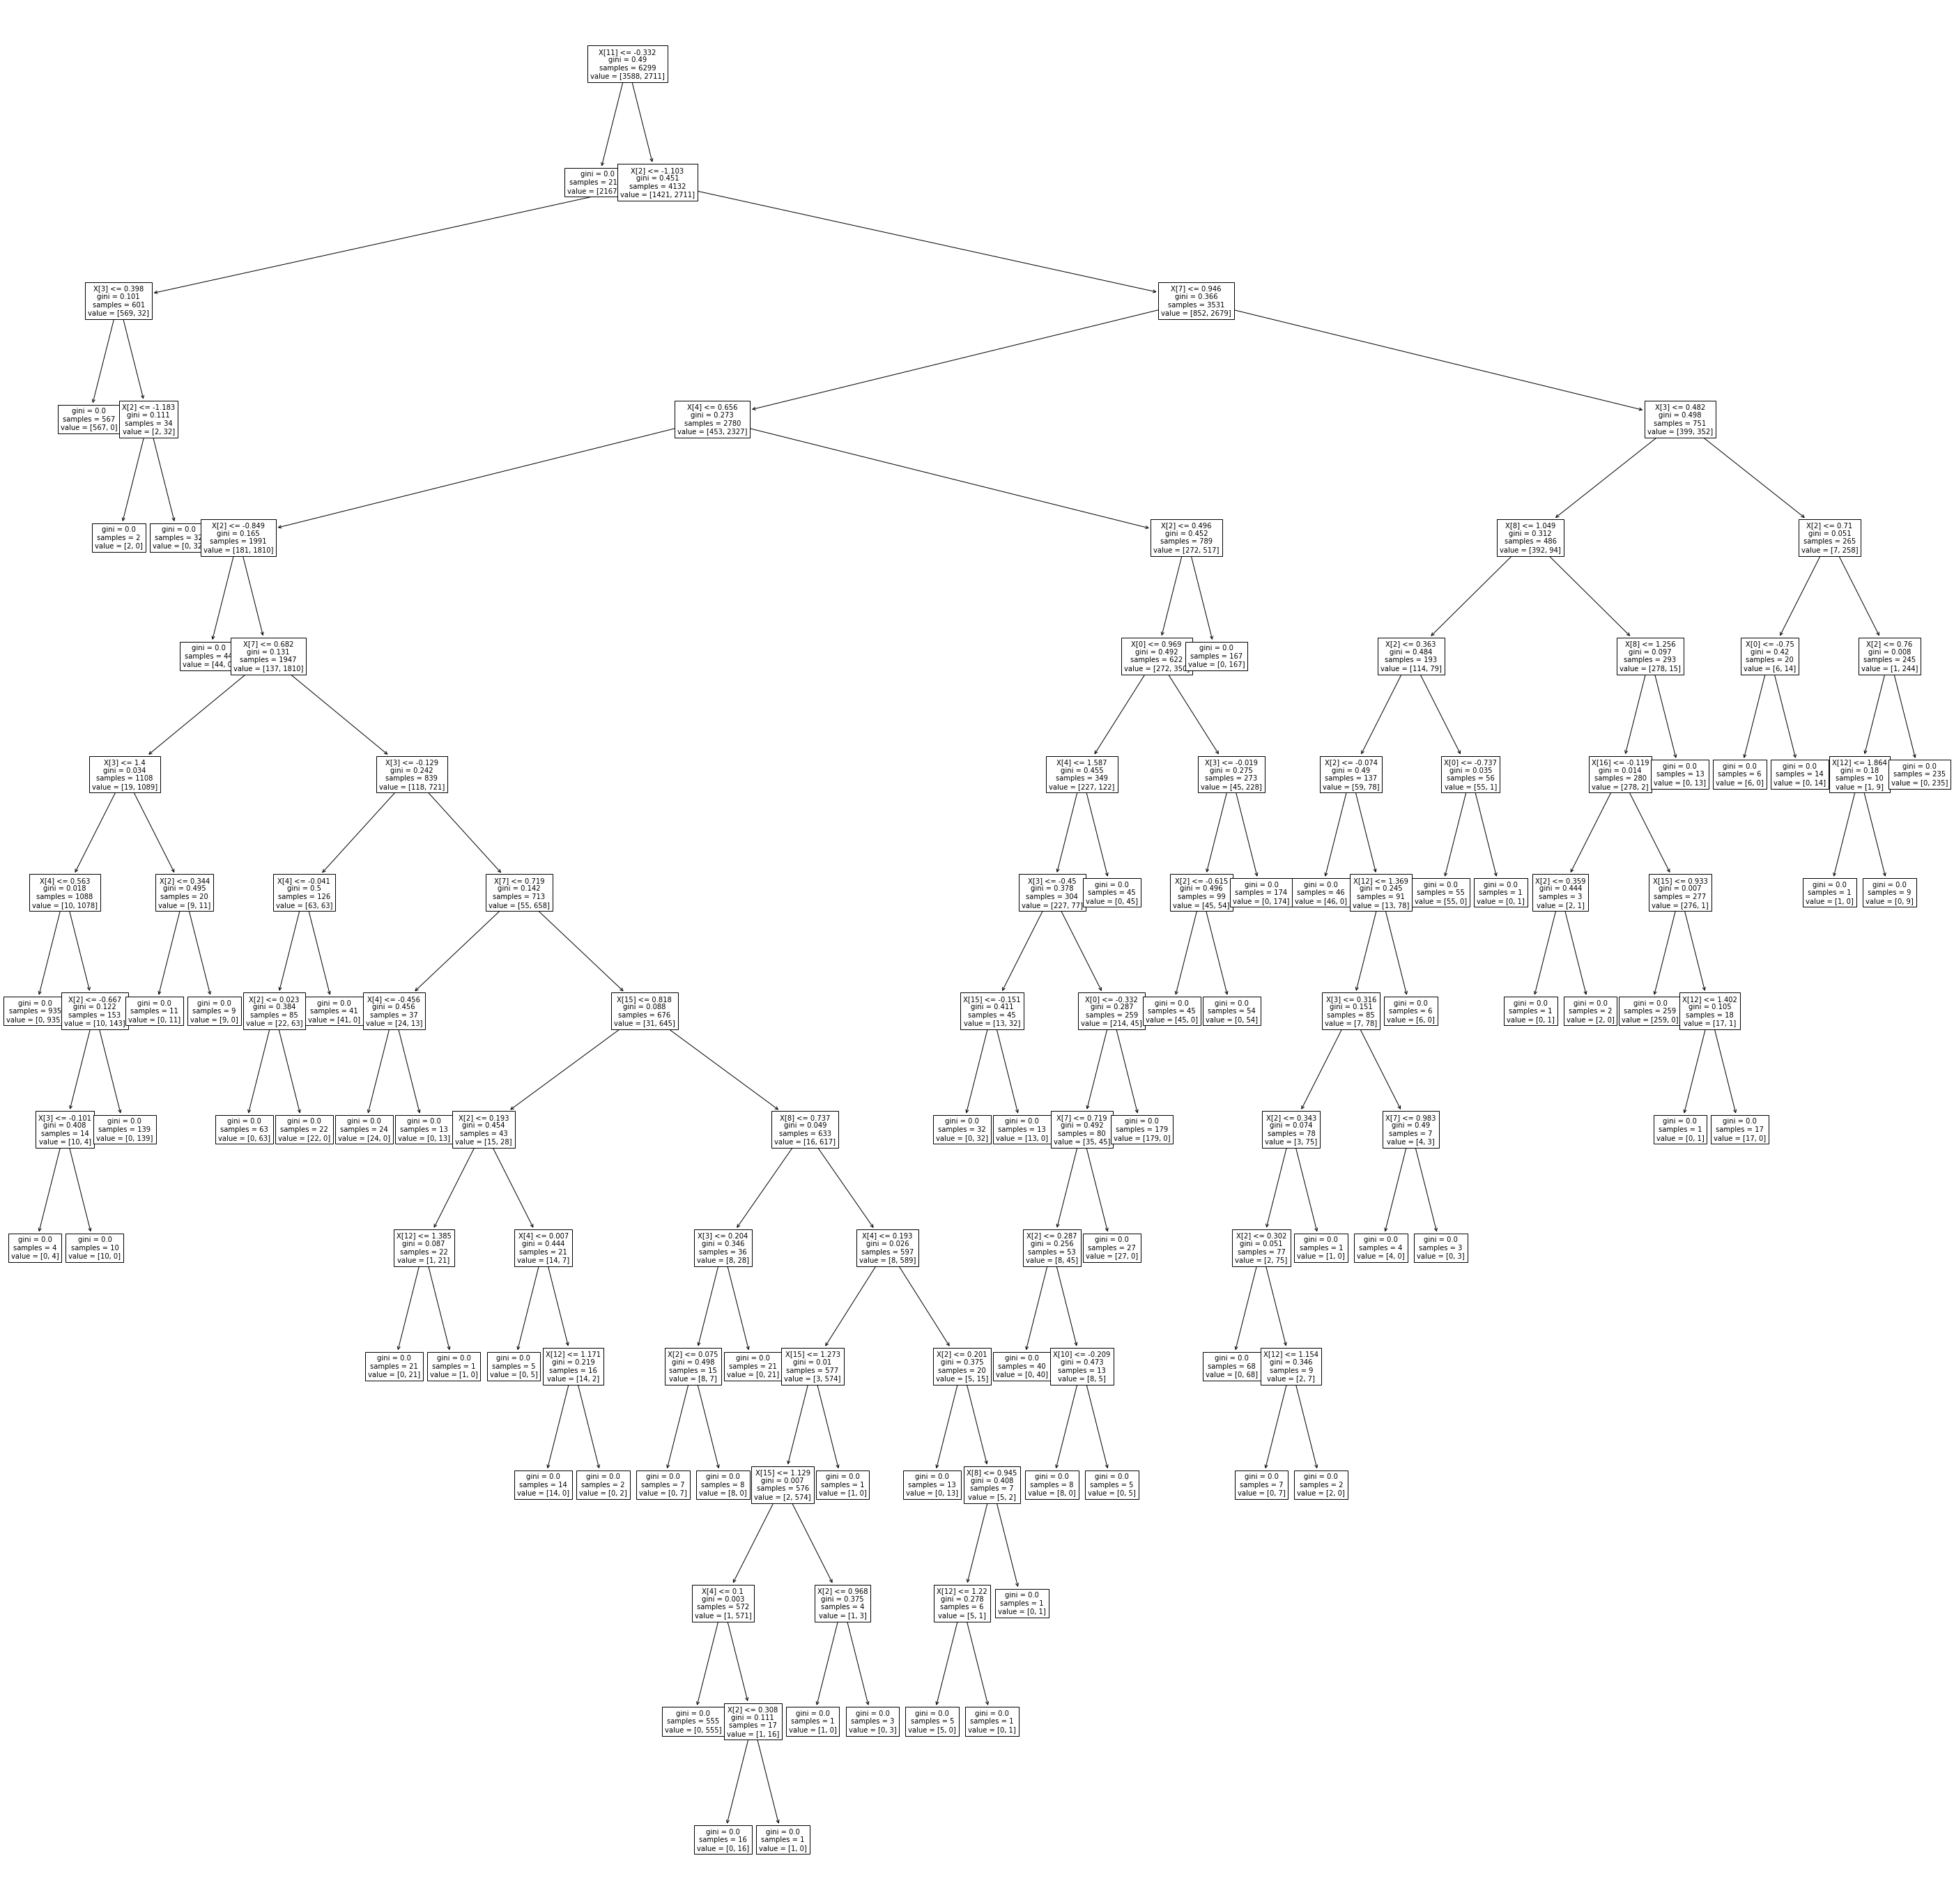

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(classifier,fontsize=10)
plt.show()

Training set vs test data

In [ ]:
# Creating the Predictor and Response Variables (dtc = decision trees classification)
dftrain = df1.drop(['Datetime','Cov_Outlier'],axis=1)
dftest = df1_test.drop(['Datetime','Cov_Outlier'],axis=1)
x_train_dtc = pd.DataFrame([])
x_train_dtc = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_dtc = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_dtc = dftrain['Fault Detection Ground Truth'].to_numpy()
y_test_dtc = dftest['Fault Detection Ground Truth'].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_dtc)

x_train_dtc = scaler.transform(x_train_dtc)
x_test_dtc = scaler.transform(x_test_dtc)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_dtc,y_train_dtc)
y_pred_dtc = classifier.predict(x_test_dtc)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_dtc, y_pred_dtc))
print(classification_report(y_test_dtc, y_pred_dtc))

[[6651  189]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      6840
           1       0.00      0.00      0.00         0

    accuracy                           0.97      6840
   macro avg       0.50      0.49      0.49      6840
weighted avg       1.00      0.97      0.99      6840



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dtc_acc_count=y_pred_dtc[y_pred_dtc==y_test_dtc]
dtc_acc=(len(dtc_acc_count)/len(y_pred_dtc))*100
print('Accuracy of decision trees classification is',dtc_acc,'%')

Accuracy of decision trees classification is 97.23684210526315 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


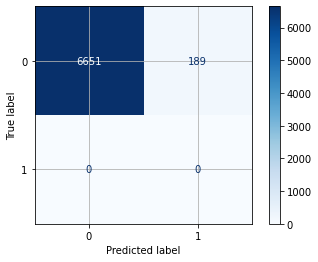

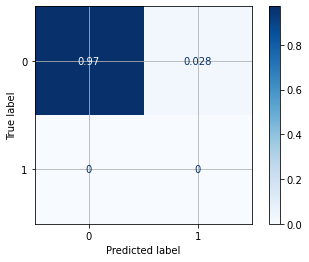

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test_dtc, y_test_dtc, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test_dtc, y_test_dtc, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()

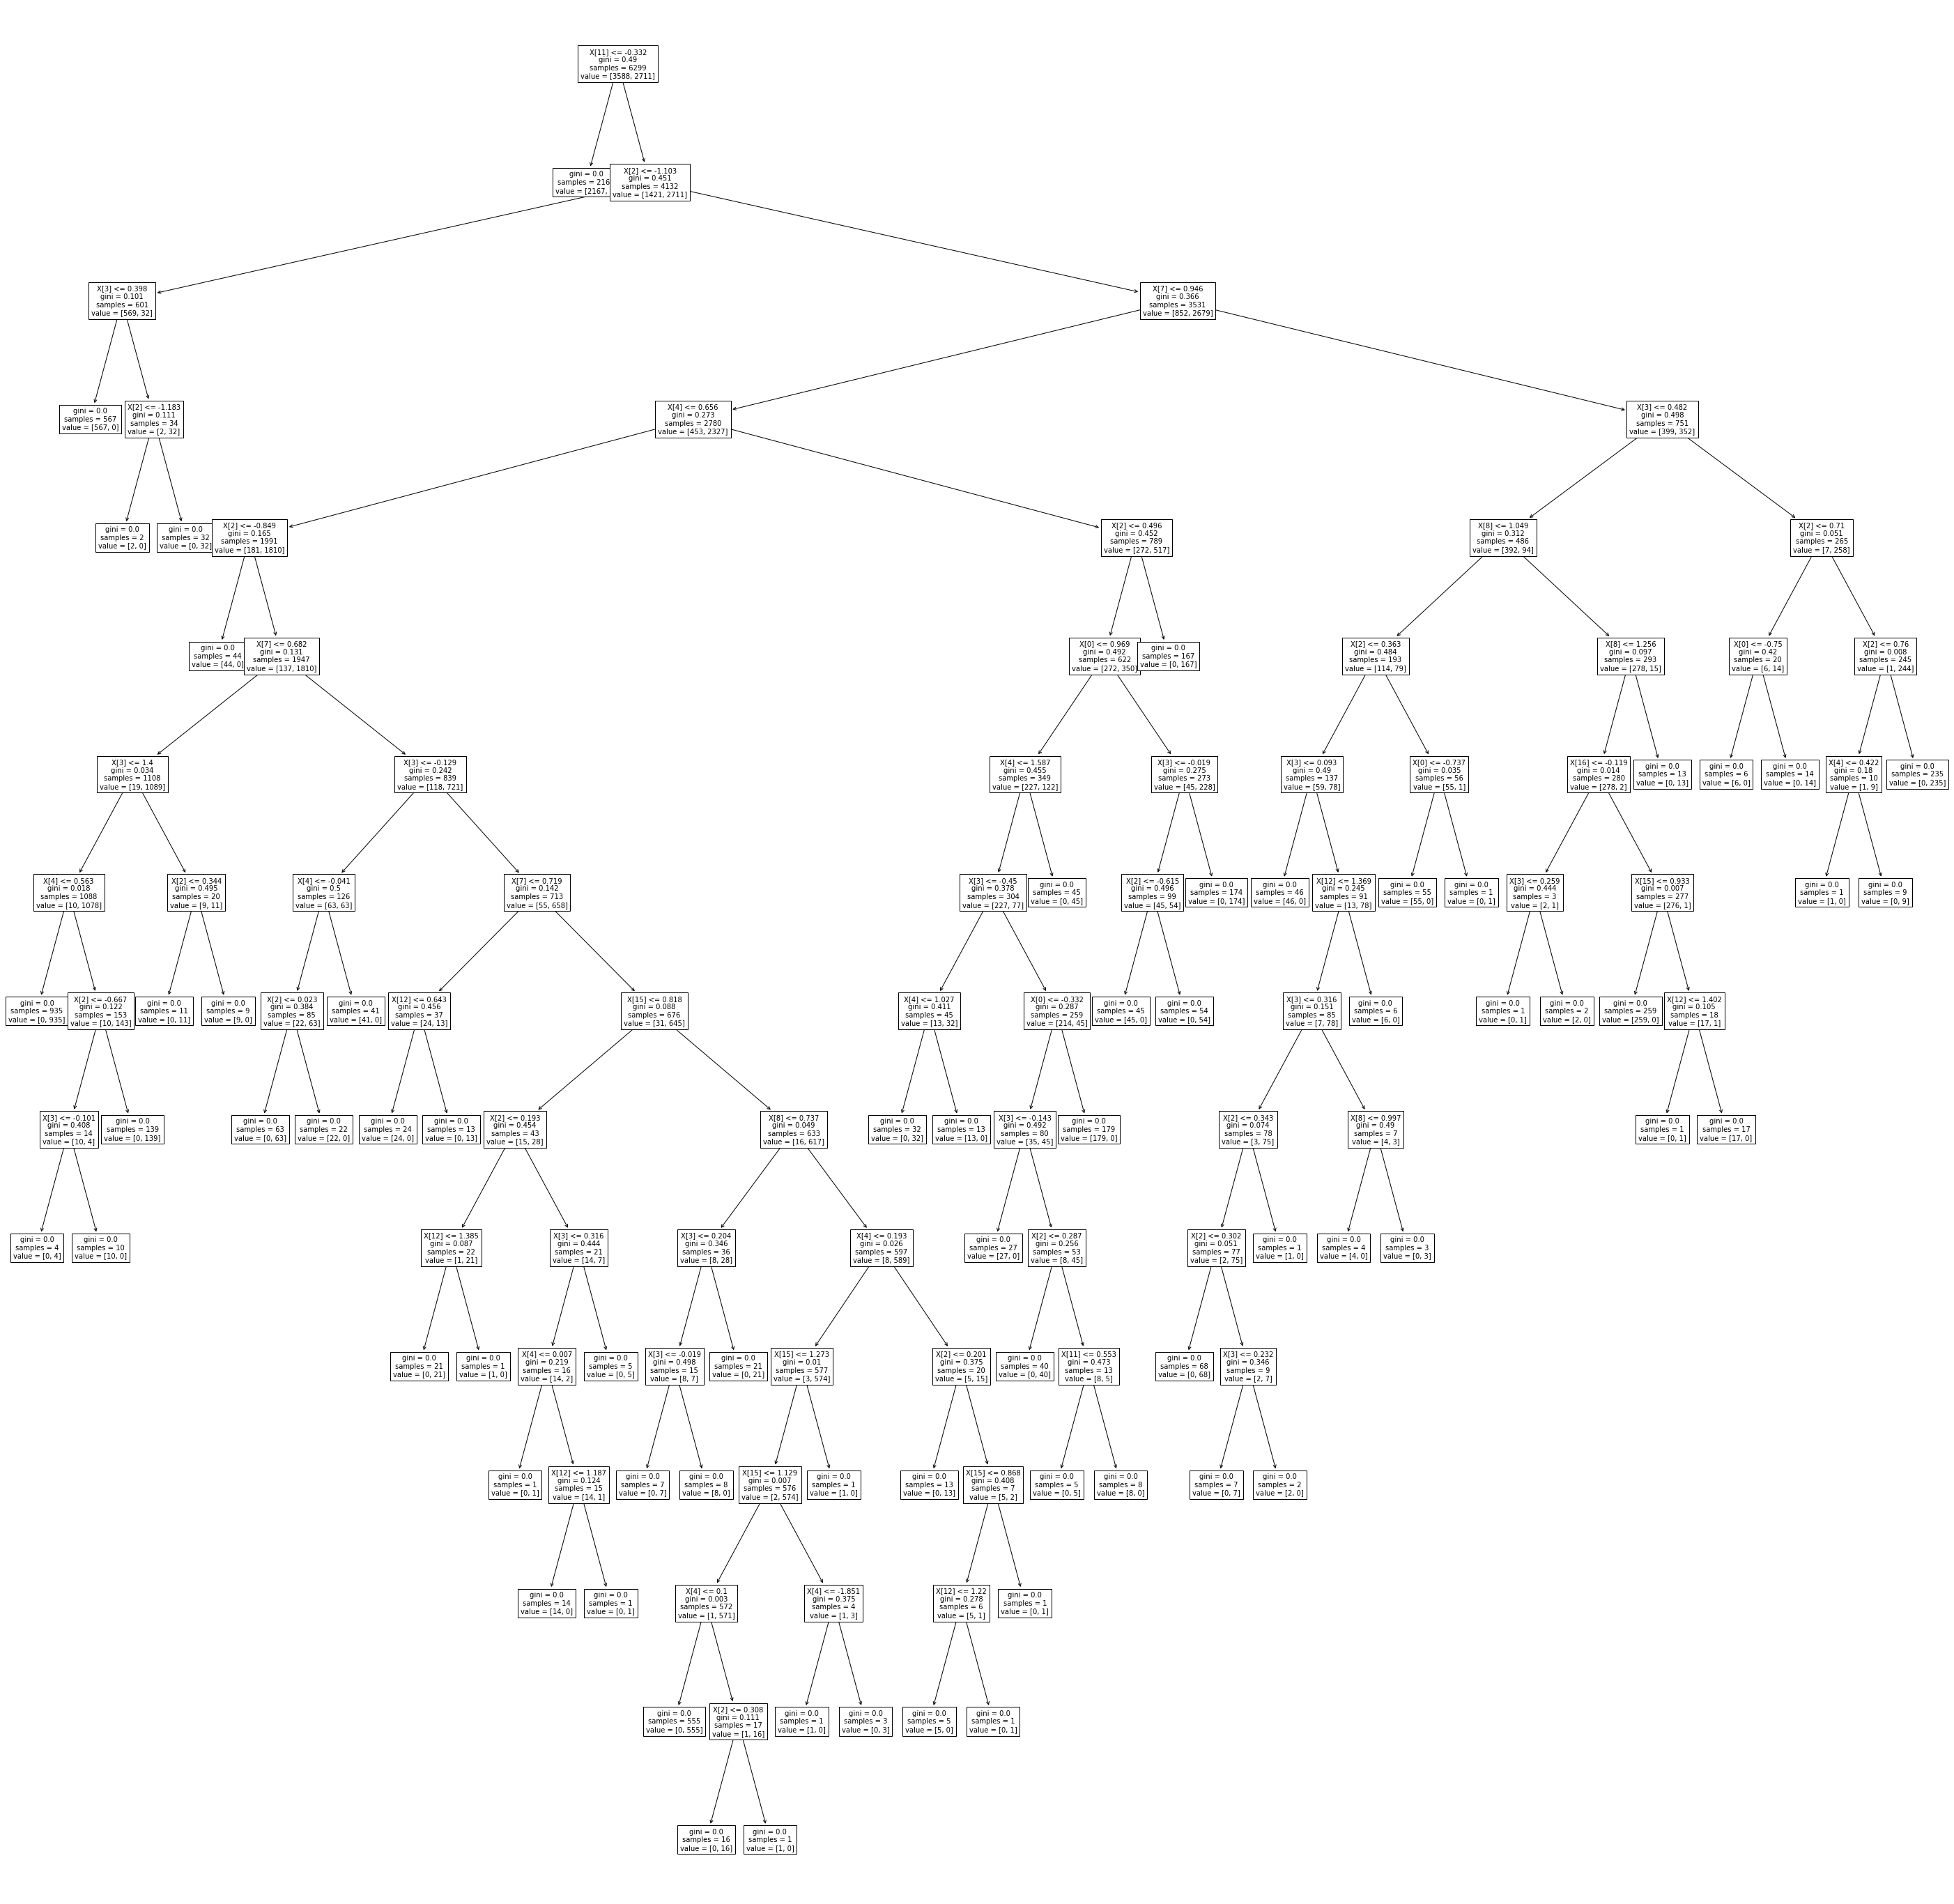

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(classifier,fontsize=10)
plt.show()

Training set vs validation and test data

In [ ]:
# Creating the Predictor and Response Variables (dtc = decision trees classification)
df1_merge = pd.concat([df1_validation,df1_test])
dftrain = df1.drop(['Datetime','Cov_Outlier'],axis=1)
dftest = df1_merge.drop(['Datetime','Cov_Outlier'],axis=1)
x_train_dtc = pd.DataFrame([])
x_train_dtc = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_dtc = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_dtc = dftrain['Fault Detection Ground Truth'].to_numpy()
y_test_dtc = dftest['Fault Detection Ground Truth'].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_dtc)

x_train_dtc = scaler.transform(x_train_dtc)
x_test_dtc = scaler.transform(x_test_dtc)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_dtc,y_train_dtc)
y_pred_dtc = classifier.predict(x_test_dtc)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_dtc, y_pred_dtc))
print(classification_report(y_test_dtc, y_pred_dtc))

[[12941   198]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13139
           1       0.00      0.00      0.00         0

    accuracy                           0.98     13139
   macro avg       0.50      0.49      0.50     13139
weighted avg       1.00      0.98      0.99     13139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dtc_acc_count=y_pred_dtc[y_pred_dtc==y_test_dtc]
dtc_acc=(len(dtc_acc_count)/len(y_pred_dtc))*100
print('Accuracy of decision trees classification is',dtc_acc,'%')

Accuracy of decision trees classification is 98.49303599969556 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


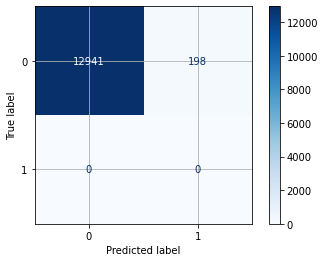

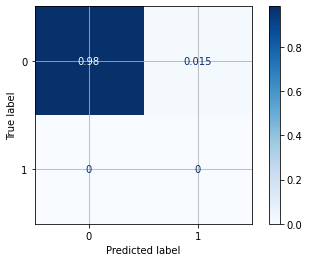

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test_dtc, y_test_dtc, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test_dtc, y_test_dtc, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()

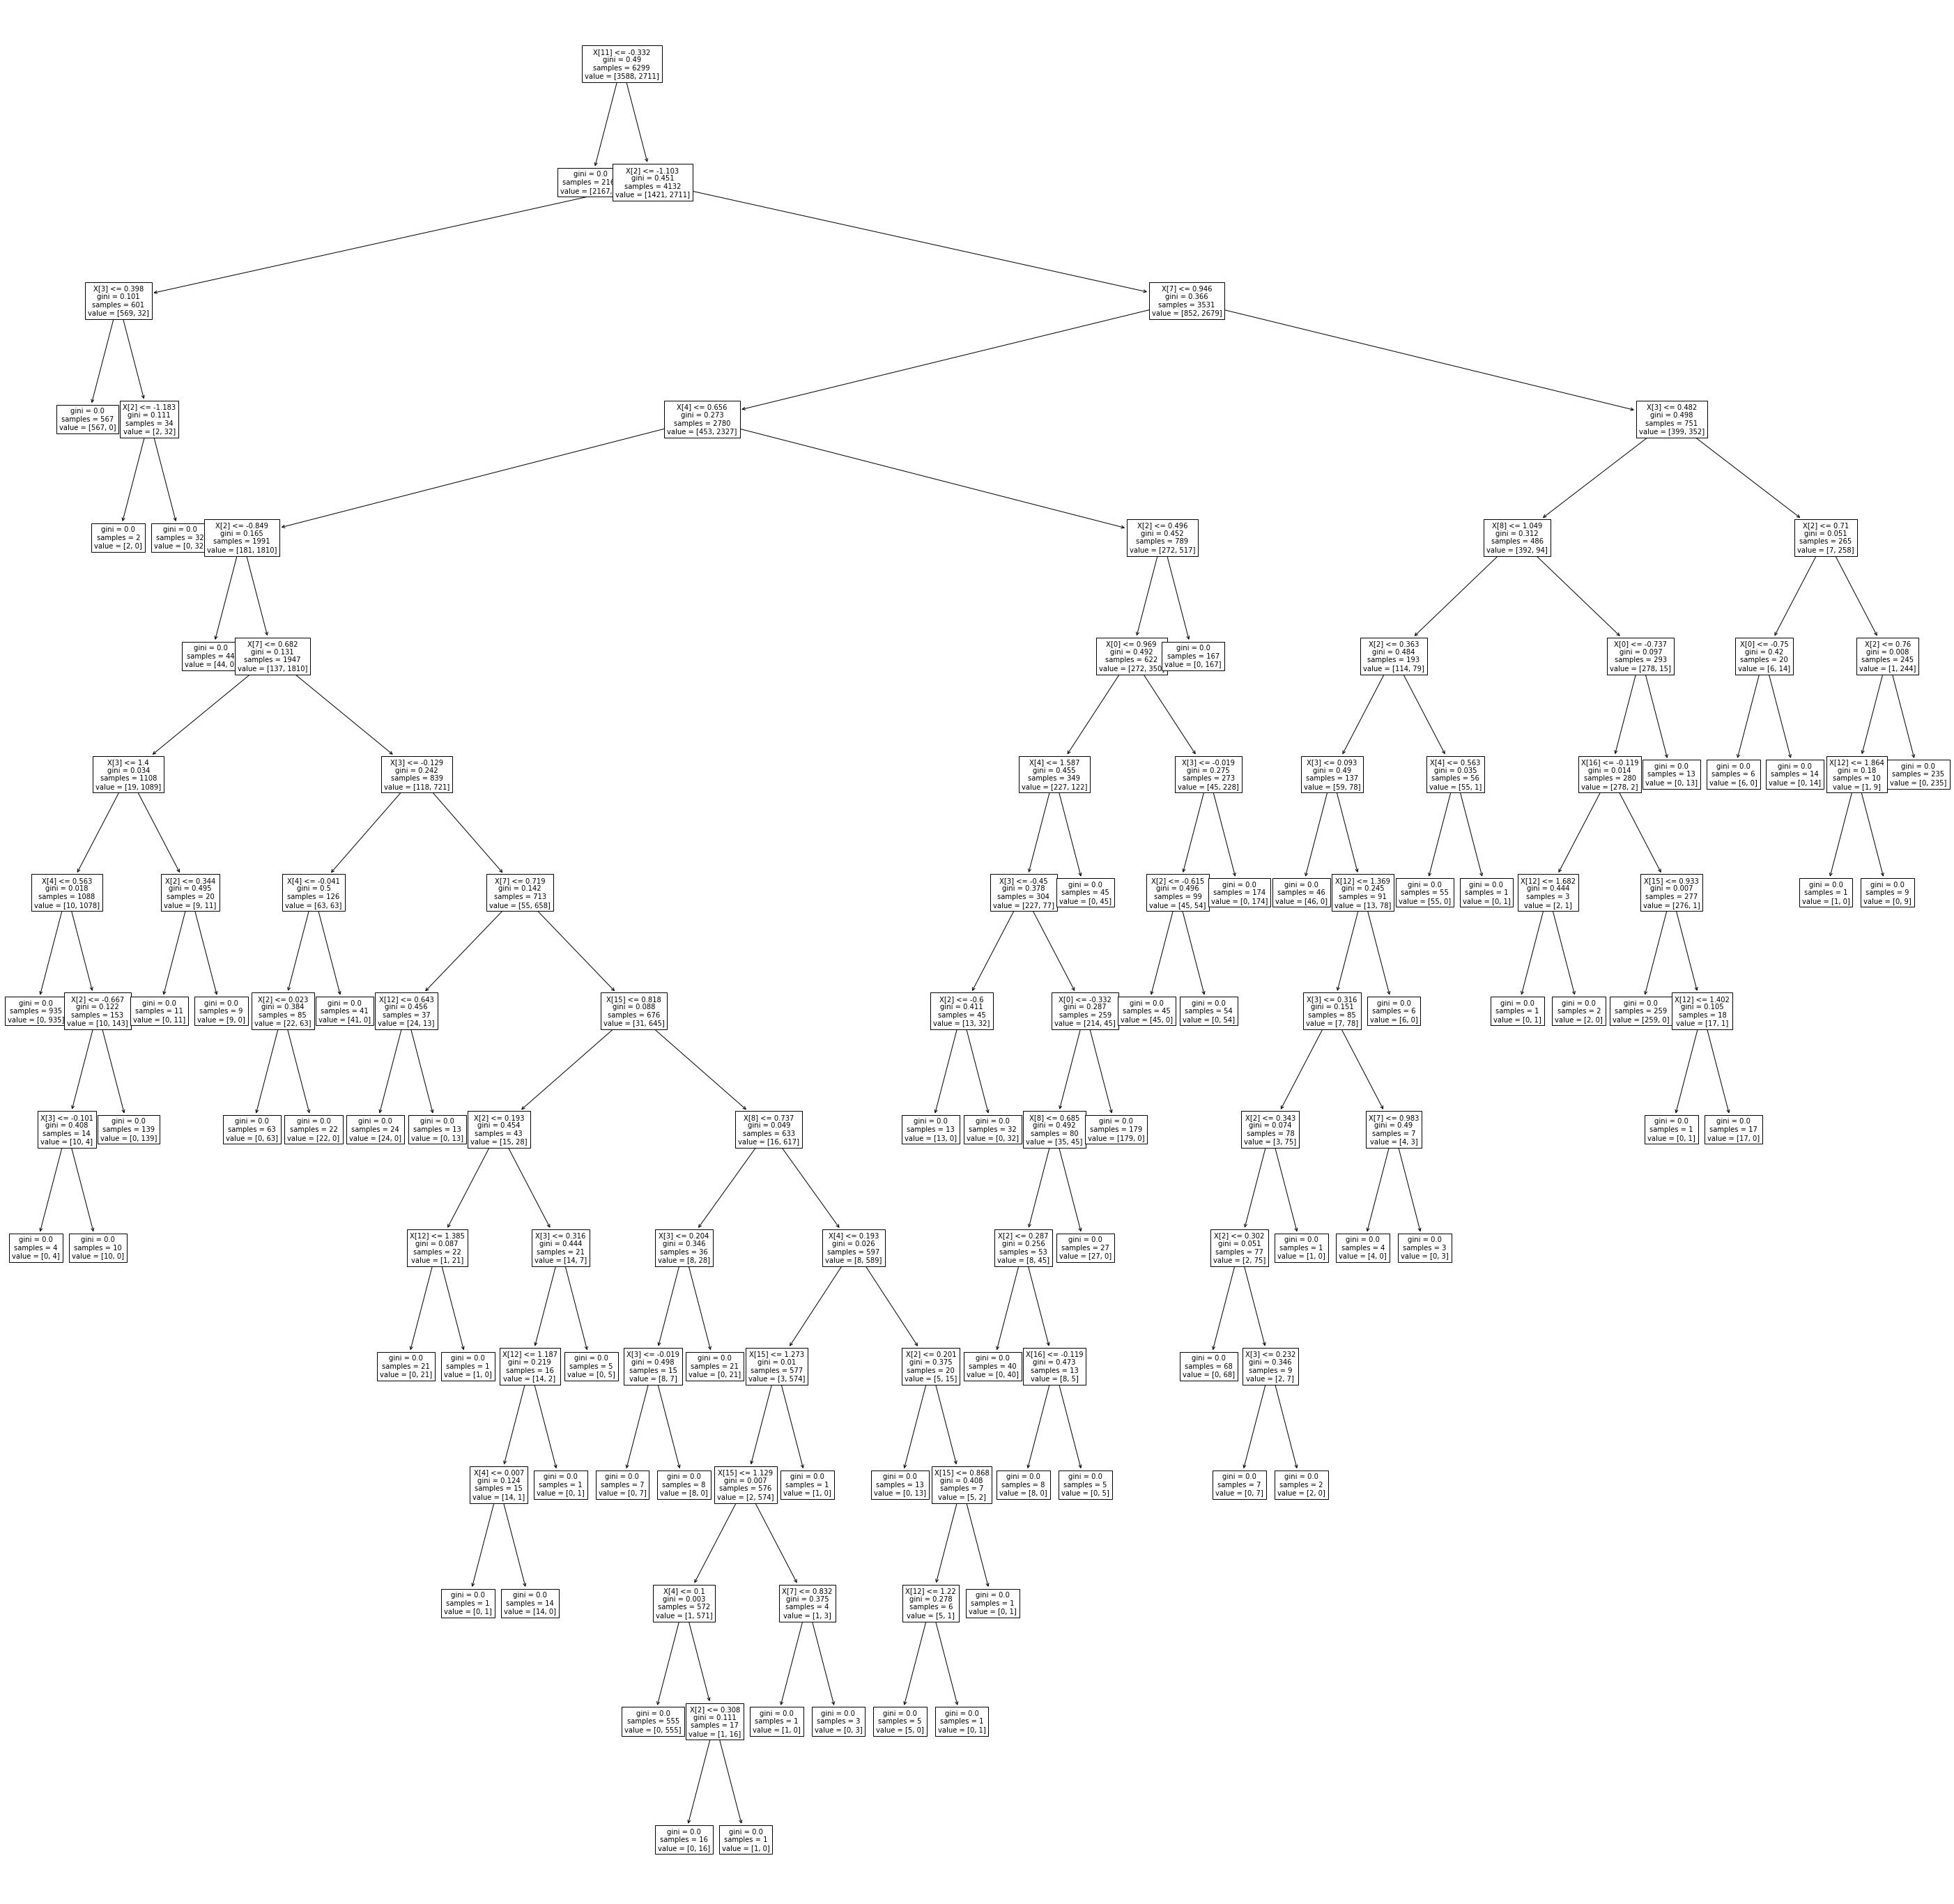

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(classifier,fontsize=10)
plt.show()

# Supervised Learning (k-nearest neighbors)


In [ ]:
# Creating the Predictor and Response Variables (dtc = decision trees classification)
df1_merge_knn = pd.concat([df1_validation,df1_test])
dftrain = df1.drop(['Datetime','Cov_Outlier'],axis=1)
dftest = df1_merge.drop(['Datetime','Cov_Outlier'],axis=1)
x_train_knn = pd.DataFrame([])
x_train_knn = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_knn = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_knn = dftrain['Fault Detection Ground Truth'].to_numpy()
y_test_knn = dftest['Fault Detection Ground Truth'].to_numpy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = classifier.predict(x_test_knn)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_knn, y_pred_knn))
print(classification_report(y_test_knn, y_pred_knn))

[[11719  1420]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     13139
           1       0.00      0.00      0.00         0

    accuracy                           0.89     13139
   macro avg       0.50      0.45      0.47     13139
weighted avg       1.00      0.89      0.94     13139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_acc_count=y_pred_knn[y_pred_knn==y_test_knn]
knn_acc=(len(knn_acc_count)/len(y_pred_knn))*100
print('Accuracy of decision trees classification is',knn_acc,'%')

Accuracy of decision trees classification is 89.19248040185707 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


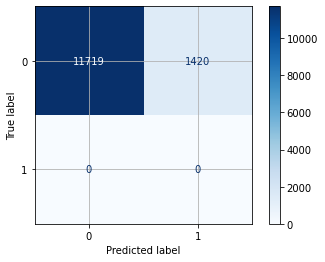

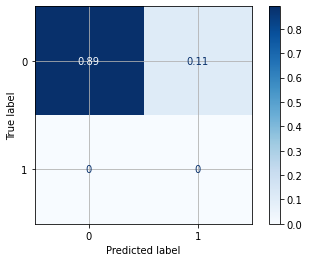

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test_knn, y_test_knn, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test_knn, y_test_knn, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()

# Supervised Learning (ANN: multi-layer perceptron)


Training vs validation and test sets

In [ ]:
# Creating the Predictor and Response Variables (dtc = decision trees classification)
df1_merge = pd.concat([df1_validation,df1_test])

dftrain = df1.drop(['Datetime','Cov_Outlier'],axis=1)
#dftrain['Datetime'] =  pd.to_datetime(dftrain['Datetime'])

dftest = df1_merge.drop(['Datetime','Cov_Outlier'],axis=1)
#dftest['Datetime'] =  pd.to_datetime(dftest['Datetime'])

x_train_MLPclass = pd.DataFrame([])
x_train_MLPclass = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_MLPclass = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_MLPclass = dftrain['Fault Detection Ground Truth'].to_numpy()
y_test_MLPclass = dftest['Fault Detection Ground Truth'].to_numpy()

In [ ]:
#Importing the MLP Classifier and training the data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 50, 100), max_iter=1000)
mlp.fit(x_train_MLPclass,y_train_MLPclass)
#Predicting on Test set
y_pred_MLPclass = mlp.predict(x_test_MLPclass)


In [ ]:
#Evaluation of the model using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_MLPclass, y_pred_MLPclass))
print(classification_report(y_test_MLPclass, y_pred_MLPclass))

[[12659   480]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     13139
           1       0.00      0.00      0.00         0

    accuracy                           0.96     13139
   macro avg       0.50      0.48      0.49     13139
weighted avg       1.00      0.96      0.98     13139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


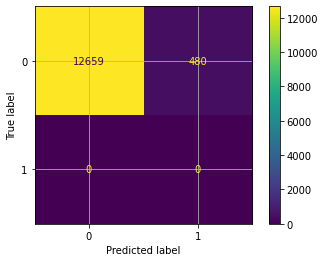

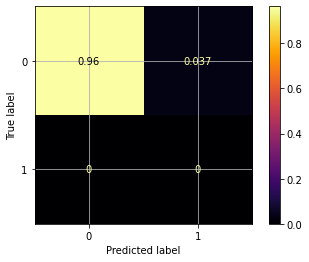

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(mlp, x_test_MLPclass, y_test_MLPclass, cmap=plt.cm.viridis)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(mlp, x_test_MLPclass, y_test_MLPclass, cmap=plt.cm.inferno,normalize='true') 
plt.grid(None)
plt.show()

# Supervised Learning (decision trees regression)



In [ ]:
#dt=decision trees regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Predictor and Response Variables
dftrain = df1.drop(['Datetime','Fault Detection Ground Truth','Cov_Outlier'],axis=1)
dftest = df1_validation.drop(['Datetime','Fault Detection Ground Truth','Cov_Outlier'],axis=1)
X_train = pd.DataFrame([])
X_train = dftrain[dftrain.columns[:]]  
X_test = dftest[dftest.columns[:]]
y_train = df1['Fault Detection Ground Truth'].to_numpy()
y_test = df1_validation['Fault Detection Ground Truth'].to_numpy()
y_train = y_train.reshape(-1,1)
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_X.fit_transform(X_train)
scaled_y = sc_y.fit_transform(y_train)
scaled_x_test = sc_X.fit_transform(X_test)

#Using the Linear Regression Model to predict the output
regressor = DecisionTreeRegressor()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred = regressor.predict(scaled_x_test)
y_pred=y_pred.reshape(-1,1)
y_pred=sc_y.inverse_transform(y_pred)

#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)

#Saving the actual output in a dataframe
y_test=pd.DataFrame(y_test)

#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)

print(test_set_rmse)
print(test_set_r2)

0.42298615634378095
0.0


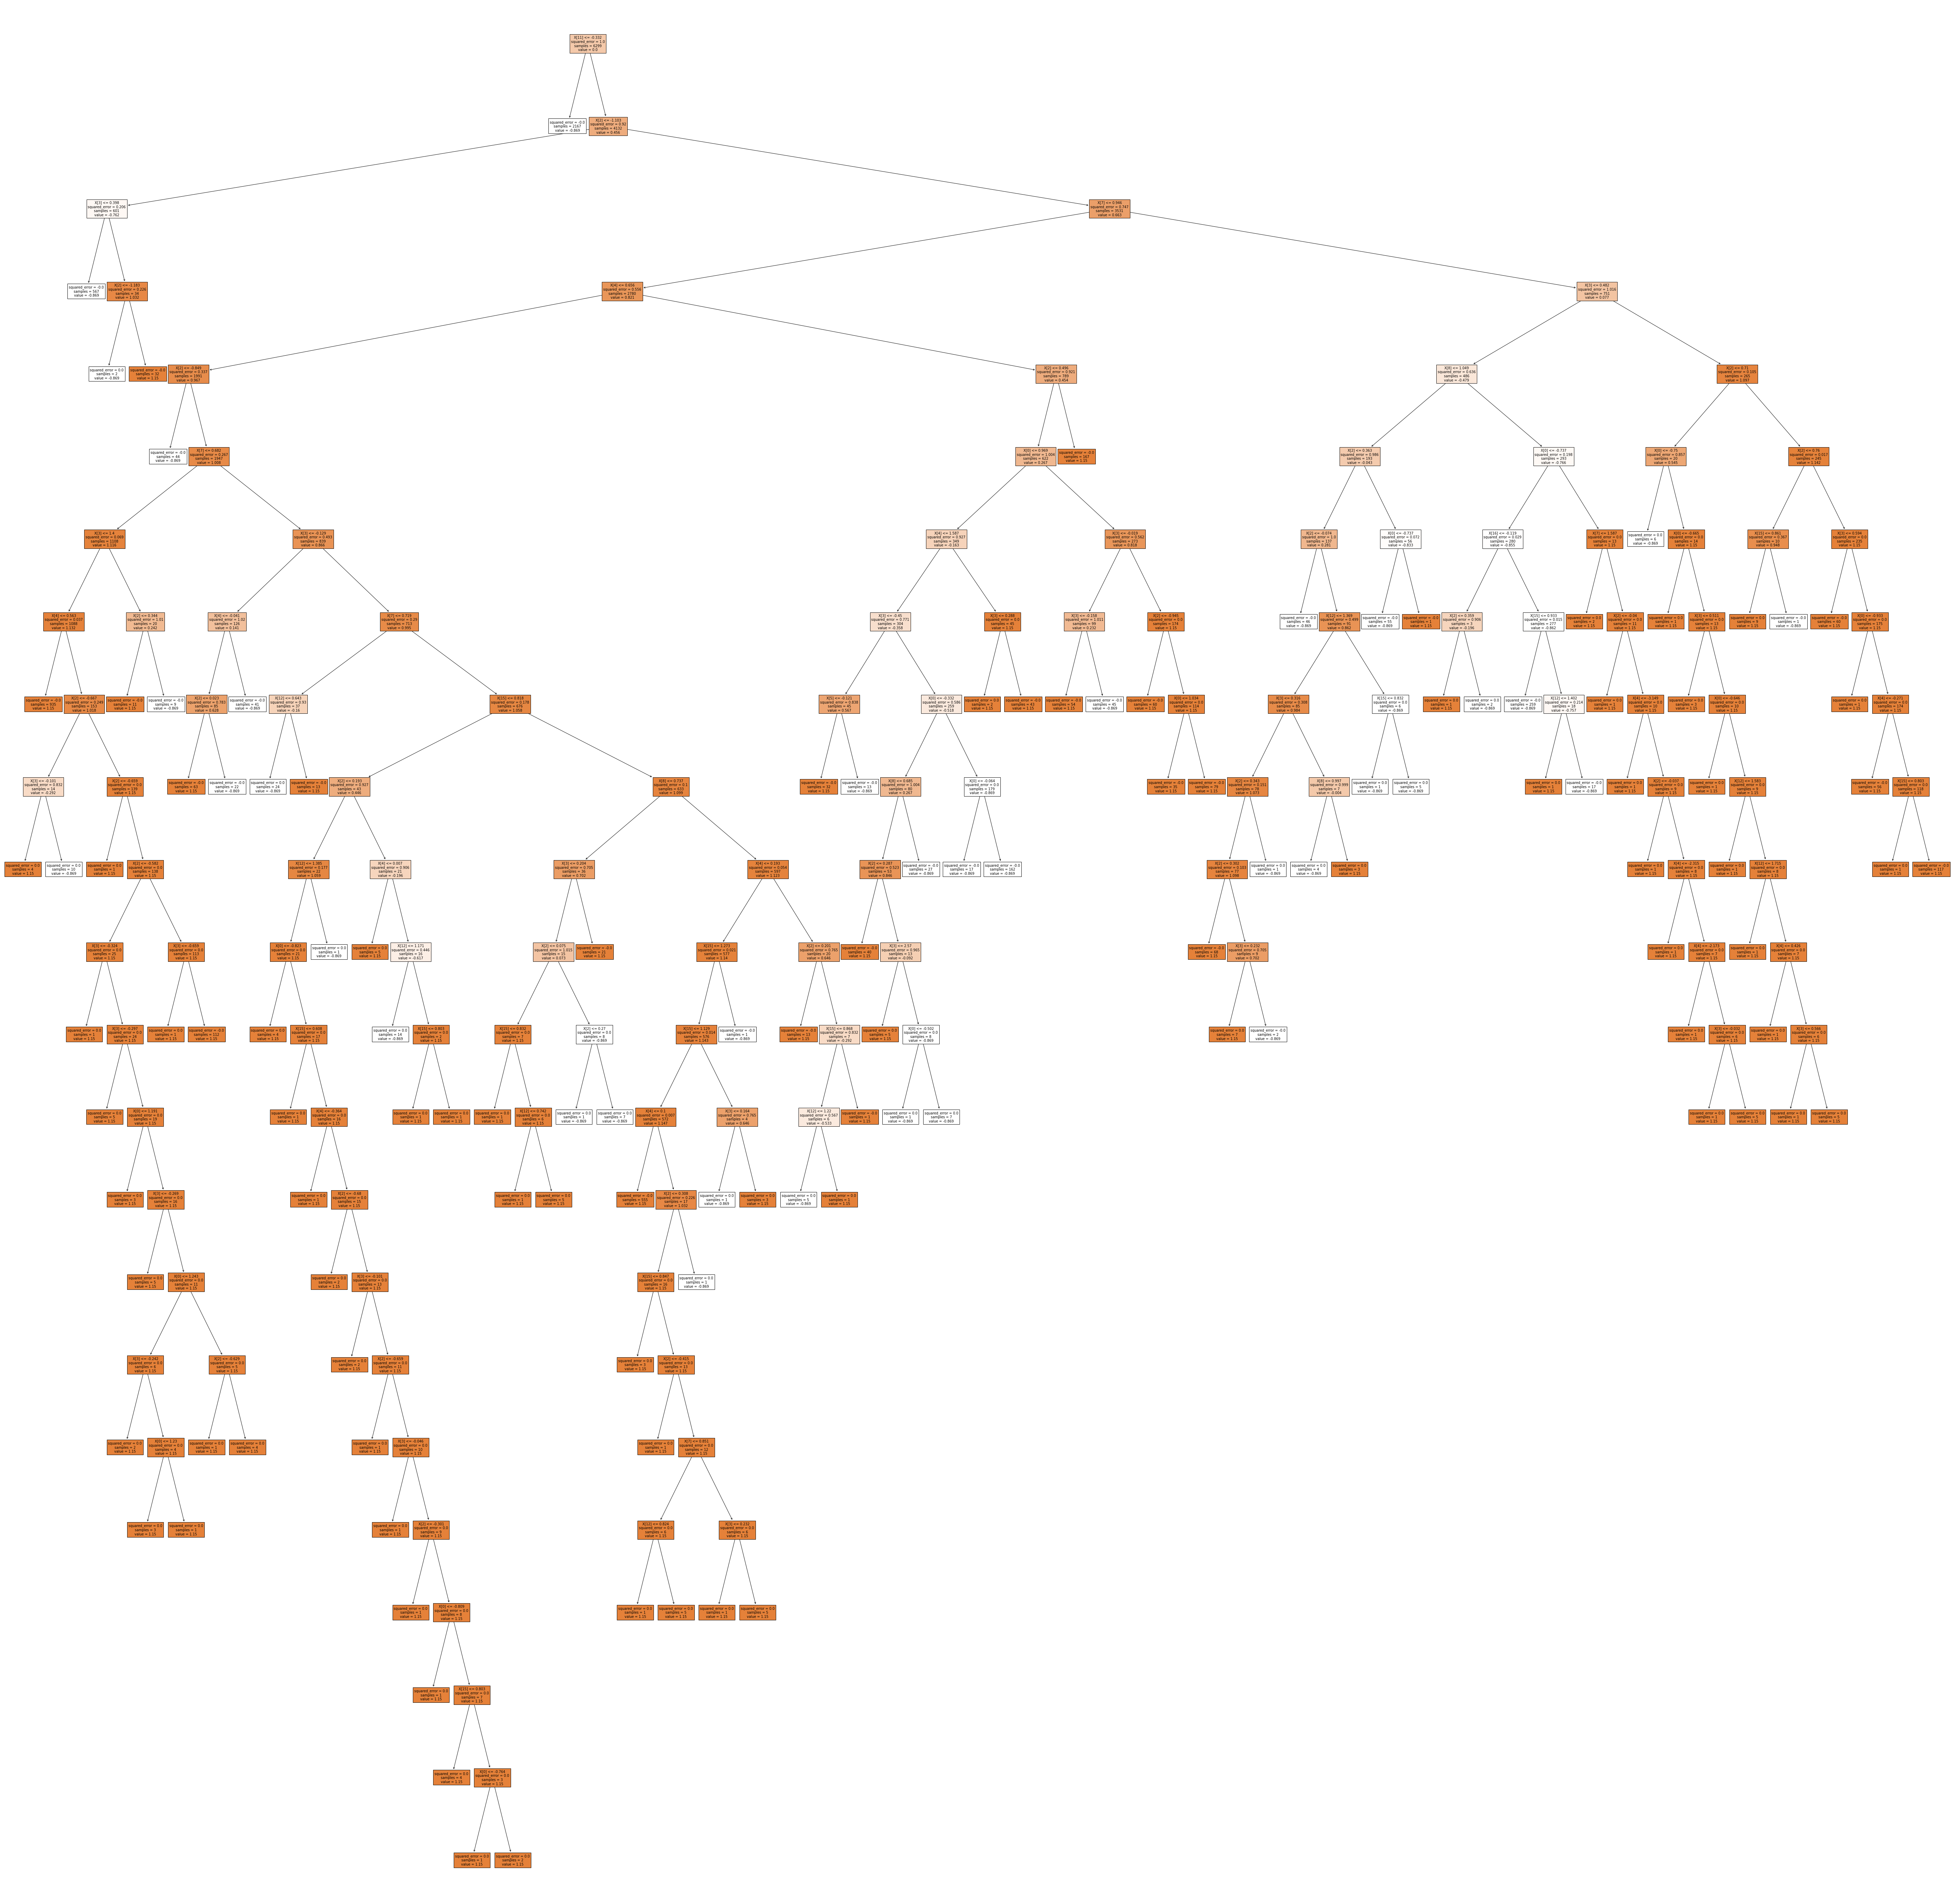

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(regressor, filled=True)



In [ ]:
#accuracy_count_dt=y_pred.iloc[:].values
acc_calc=y_pred.values                                    #turn into array for processing
acc_calc[np.abs(acc_calc)< 1e-14]=0                       #truncate excessively small values to 0
y_test_calc=y_test.iloc[:].values                         #turn into array for processing
accuracy_count_dt=acc_calc[acc_calc==y_test_calc]

accuracy_dt=(len(accuracy_count_dt)/len(y_pred))*100
print('Accuracy of decision trees is',accuracy_dt,'%')

Accuracy of decision trees is 82.10827115415145 %


# Supervised Learning (linear regression)



In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Creating the Predictor and Response Variables (linear = linear regression)
df1_merge = pd.concat([df1_validation,df1_test])
dftrain = df1.drop(['Datetime','Cov_Outlier'],axis=1)
dftest = df1_merge.drop(['Datetime','Cov_Outlier'],axis=1)
x_train_linear = pd.DataFrame([])
x_train_linear = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_linear = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_linear = dftrain['Fault Detection Ground Truth'].to_numpy()
y_train_linear = y_train_linear.reshape(-1,1)
y_test_linear = dftest['Fault Detection Ground Truth'].to_numpy()


In [ ]:
#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_x_test=StandardScaler()

scaled_x = sc_X.fit_transform(x_train_linear)
scaled_y=sc_y.fit_transform(y_train_linear)
scaled_x_test=sc_X.fit_transform(x_test_linear)


#Using the Linear Regression Model to predict the output
regressor = LinearRegression()
regressor.fit(scaled_x,scaled_y.ravel())
y_pred_lineartrain = regressor.predict(scaled_x)
y_pred_lineartrain=y_pred_lineartrain.reshape(-1,1)
y_pred_lineartrain=sc_y.inverse_transform(y_pred_lineartrain)

#Saving the predicted TRAINING DATA output in a dataframe
y_pred_lineartrain=pd.DataFrame(y_pred_lineartrain)


#Truncate outputs for accuracy
y_pred_lineartrain=y_pred_lineartrain.to_numpy()                                   #turn into array for processing
y_pred_lineartrain[np.abs(y_pred_lineartrain)> 0.5]=1
y_pred_lineartrain[np.abs(y_pred_lineartrain)<0.5]=0

#Calculating the R squared and Mean Squared Error Values
training_set_rmse = (np.sqrt(mean_squared_error(y_train_linear, y_pred_lineartrain)))
training_set_r2 = r2_score(y_train_linear, y_pred_lineartrain)

print(training_set_rmse)
print(training_set_r2)

0.46414547374390275
0.12124157043006145


In [ ]:
y_pred_linear = regressor.predict(scaled_x_test)
y_pred_linear=y_pred_linear.reshape(-1,1)
y_pred_linear=sc_y.inverse_transform(y_pred_linear)

#Saving the predicted TEST DATA output in a dataframe
y_pred_linear=pd.DataFrame(y_pred_linear)


#Saving the actual TEST data output in a dataframe
y_test_linear=pd.DataFrame(y_test_linear)

#Truncate outputs for accuracy
y_pred_linear=y_pred_linear.to_numpy()                                   #turn into array for processing
y_pred_linear[np.abs(y_pred_linear)> 0.5]=1
y_pred_linear[np.abs(y_pred_linear)<0.5]=0

#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y_test_linear, y_pred_linear)))
test_set_r2 = r2_score(y_test_linear, y_pred_linear)

print(test_set_rmse)
print(test_set_r2)

0.6155876619714732
0.0


In [ ]:
#accuracy_count_dt=y_pred.iloc[:].values
acc_calc_linear=y_pred_linear
y_test_linear_calc=y_test_linear.iloc[:].values                                #turn into array for processing
accuracy_count_linear=acc_calc_linear[acc_calc_linear==y_test_linear_calc]

accuracy_linear=(len(accuracy_count_linear)/len(y_pred_linear))*100
print('Accuracy of linear regression is',accuracy_linear,'%')

Accuracy of linear regression is 62.10518304284953 %


# Supervised Learning (ANN: long short-term memory (LSTM))



In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
# Creating the Predictor and Response Variables (LSTM=long short-term memory)
#df1_merge = pd.concat([df1_validation,df1_test])

dftrain = df1.drop(['Cov_Outlier'],axis=1)
dftrain['Datetime'] =  pd.to_datetime(dftrain['Datetime'])
dftrain = dftrain.set_index(['Datetime'])

dftest = df1_validation.drop(['Cov_Outlier'],axis=1)
dftest['Datetime'] =  pd.to_datetime(dftest['Datetime'])
dftest = dftest.set_index(['Datetime'])

df_blindtest=df1_test.drop(['Cov_Outlier'],axis=1)
df_blindtest['Datetime'] =  pd.to_datetime(df_blindtest['Datetime'])
df_blindtest = df_blindtest.set_index(['Datetime'])


x_train_LSTM = pd.DataFrame([])
x_train_LSTM = dftrain.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
x_test_LSTM = dftest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_train_LSTM = dftrain['Fault Detection Ground Truth'].to_numpy()
y_train_LSTM = y_train_linear.reshape(-1,1)
y_test_LSTM = dftest['Fault Detection Ground Truth'].to_numpy()

In [ ]:
model1 = Sequential()
model1.add(InputLayer((17,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(x_train_LSTM,y_train_LSTM, validation_data=(x_test_LSTM,y_test_LSTM),epochs=10,callbacks=[cp])

Epoch 1/10
197/197 [==============================] - ETA: 0s - loss: 0.2614 - root_mean_squared_error: 0.5113

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


197/197 [==============================] - 21s 89ms/step - loss: 0.2614 - root_mean_squared_error: 0.5113 - val_loss: 0.1691 - val_root_mean_squared_error: 0.4113
Epoch 2/10
197/197 [==============================] - 9s 44ms/step - loss: 0.2452 - root_mean_squared_error: 0.4952 - val_loss: 0.1732 - val_root_mean_squared_error: 0.4162
Epoch 3/10
197/197 [==============================] - 7s 37ms/step - loss: 0.2437 - root_mean_squared_error: 0.4937 - val_loss: 0.1809 - val_root_mean_squared_error: 0.4254
Epoch 4/10
195/197 [============================>.] - ETA: 0s - loss: 0.2428 - root_mean_squared_error: 0.4928

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


197/197 [==============================] - 14s 73ms/step - loss: 0.2427 - root_mean_squared_error: 0.4926 - val_loss: 0.1523 - val_root_mean_squared_error: 0.3902
Epoch 5/10
197/197 [==============================] - 7s 35ms/step - loss: 0.2420 - root_mean_squared_error: 0.4919 - val_loss: 0.1712 - val_root_mean_squared_error: 0.4138
Epoch 6/10
195/197 [============================>.] - ETA: 0s - loss: 0.2401 - root_mean_squared_error: 0.4900

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


197/197 [==============================] - 18s 94ms/step - loss: 0.2401 - root_mean_squared_error: 0.4900 - val_loss: 0.1444 - val_root_mean_squared_error: 0.3800
Epoch 7/10
197/197 [==============================] - 7s 35ms/step - loss: 0.2378 - root_mean_squared_error: 0.4877 - val_loss: 0.1461 - val_root_mean_squared_error: 0.3822
Epoch 8/10
196/197 [============================>.] - ETA: 0s - loss: 0.2342 - root_mean_squared_error: 0.4839

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


197/197 [==============================] - 18s 91ms/step - loss: 0.2341 - root_mean_squared_error: 0.4838 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3102
Epoch 9/10
195/197 [============================>.] - ETA: 0s - loss: 0.2274 - root_mean_squared_error: 0.4769

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


197/197 [==============================] - 16s 81ms/step - loss: 0.2275 - root_mean_squared_error: 0.4769 - val_loss: 0.0633 - val_root_mean_squared_error: 0.2517
Epoch 10/10
194/197 [============================>.] - ETA: 0s - loss: 0.2156 - root_mean_squared_error: 0.4643

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


197/197 [==============================] - 15s 76ms/step - loss: 0.2158 - root_mean_squared_error: 0.4645 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2138


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')


In [ ]:
x_blindtest_LSTM = df_blindtest.drop(['Fault Detection Ground Truth'],axis=1).to_numpy()
y_blindtest_LSTM = df_blindtest['Fault Detection Ground Truth'].to_numpy()

y_pred_LSTM = model1.predict(x_blindtest_LSTM).flatten()


In [ ]:
#Truncate outputs for accuracy
#y_pred_LSTM=y_pred_LSTM.to_numpy()                                   #turn into array for processing
y_pred_LSTM[np.abs(y_pred_LSTM)> 0.5]=1
y_pred_LSTM[np.abs(y_pred_LSTM)<0.5]=0

train_results = pd.DataFrame(data={'Train Predictions':y_pred_LSTM,'Actuals':y_blindtest_LSTM})
train_results

Train Predictions  Actuals
0                   0.0        0
1                   0.0        0
2                   0.0        0
3                   0.0        0
4                   0.0        0
...                 ...      ...
6835                0.0        0
6836                0.0        0
6837                0.0        0
6838                0.0        0
6839                0.0        0

[6840 rows x 2 columns]

In [ ]:
accuracy_count_LSTM=y_pred_LSTM[y_pred_LSTM==y_blindtest_LSTM]

accuracy_LSTM=(len(accuracy_count_LSTM)/len(y_pred_LSTM))*100
print('Accuracy of LSTM is',accuracy_LSTM,'%')

Accuracy of LSTM is 100.0 %
